<img src="img1.jpg" align=”center”>
<h1>Previsão de transações bancárias de 200.000 clientes Santander</h1> <br>
Projeto criado por <b>Alessandra Faria Abreu</b> enquanto ouvia Banda Eva e tomava café <br>
Desafio disponivel no <a href="https://www.kaggle.com/c/santander-customer-transaction-prediction">Kaggle</a>

<p>Importação das bibliotecas<p>

In [3]:
#permite que os gráficos gerados sejam mostrados na mesma janela
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model 
from sklearn.model_selection import train_test_split 
#import plotly.graph_objs as go
#define o estilo dos gráficos , "ggplot" é um estilo popular em R
plt.style.use('ggplot') 

<p>Leitura das bases<p>

In [4]:
#@title Default title text
#Realiza a leitura da base (csv) e carrega na mémoria
transacoesTrain = pd.read_csv('train.csv')
transacoesTest = pd.read_csv('test.csv')

<h1>Exploração das Bases</h1><br>
<h2>Visualização da relação de dados da base Train - Dados</h2>

In [5]:
#Visualizar os 5 primeiros registros da base
transacoesTrain.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [6]:
#Resumo dos dados registrados na Base
transacoesTrain.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8      ...              var_190  \
count  200000.000000  200000.000000      ...        200000.000000   
mean       16.545850       0.284162      ...             3.234440   
std         3.418076       3.332634      ...             4.559922   
min         5.349700     -10.505500      ...           -14.093300   
25%        13.943800      -2.317800      ...            -0.058825   
50%        16.456800       0.393700      ...             3.203600   
75%        19.102900       2.937900      ...             6.406200   
max        27.691800      10.151300      ...            18.440900   

             var_191        var_192        var_193        var_194  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        7.438408       1.927839       3.331774      17.993784   
std         3.023272       1.478423       3.992030       3.135162   
min        -2.691700      -3.814500     -11.783400       8.694400   
25%         5.157400       0.889775       0.584600      15.629800   
50%         7.347750       1.901300       3.396350      17.957950   
75%         9.512525       2.949500       6.205800      20.396525   
max        16.716500       8.402400      18.281800      27.928800   

             var_195        var_196        var_197        var_198  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -0.142088       2.303335       8.908158      15.870720   
std         1.429372       5.454369       0.921625       3.010945   
min        -5.261000     -14.209600       5.960600       6.299300   
25%        -1.170700      -1.946925       8.252800      13.829700   
50%        -0.172700       2.408900       8.888200      15.934050   
75%         0.829600       6.556725       9.593300      18.064725   
max         4.272900      18.321500      12.000400      26.079100   

             var_199  
count  200000.000000  
mean       -3.326537  
std        10.438015  
min       -38.852800  
25%       -11.208475  
50%        -2.819550  
75%         4.836800  
max        28.500700  

[8 rows x 201 columns]

In [7]:
#Tipo de dado por coluna - para verificar se são todos numericos
transacoesTrain.dtypes.head()

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
dtype: object

In [8]:
#Quantidade de linhas e colunas
transacoesTrain.shape

(200000, 202)

In [9]:
#Verifica se tem valores nulos Train
transacoesTrain.isnull().any().any()

False

In [10]:
#Verifica se tem valores nulos Test
transacoesTest.isnull().any().any()

False

<h2>Visualização das Bases - Gráficos</h2>

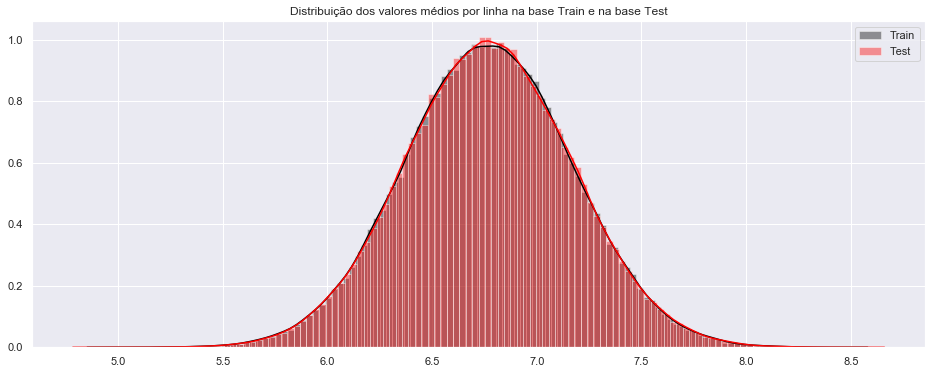

In [12]:
#Distribuição dos valores médios - comparativo LINHA
plt.figure(figsize=(16,6))
features = transacoesTrain.columns.values[2:202]
plt.title("Distribuição dos valores médios por linha na base Train e na base Test")
sns.distplot(transacoesTrain[features].mean(axis=1),color="black", kde=True,bins=120, label='Train')
sns.distplot(transacoesTest[features].mean(axis=1),color="red", kde=True,bins=120, label='Test')
plt.legend()
plt.show()

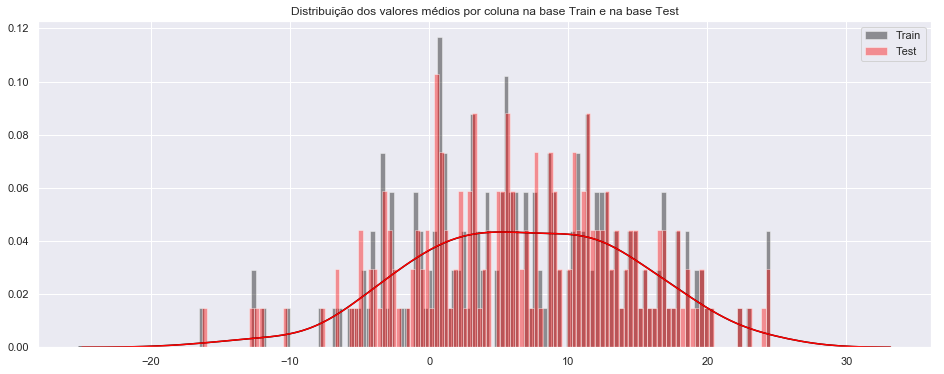

In [13]:
plt.figure(figsize=(16,6))
plt.title("Distribuição dos valores médios por coluna na base Train e na base Test")
sns.distplot(transacoesTrain[features].mean(axis=0),color="black",kde=True,bins=120, label='Train')
sns.distplot(transacoesTest[features].mean(axis=0),color="red", kde=True,bins=120, label='Test')
plt.legend()
plt.show()

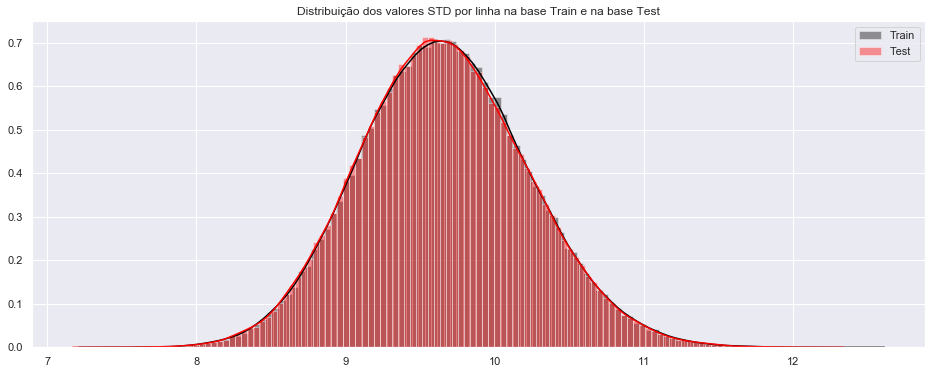

In [14]:
#Distribuição dos valores std - comparativo LINHA
plt.figure(figsize=(16,6))
features = transacoesTrain.columns.values[2:202]
plt.title("Distribuição dos valores STD por linha na base Train e na base Test")
sns.distplot(transacoesTrain[features].std(axis=1),color="black", kde=True,bins=120, label='Train')
sns.distplot(transacoesTest[features].std(axis=1),color="red", kde=True,bins=120, label='Test')
plt.legend()
plt.show()

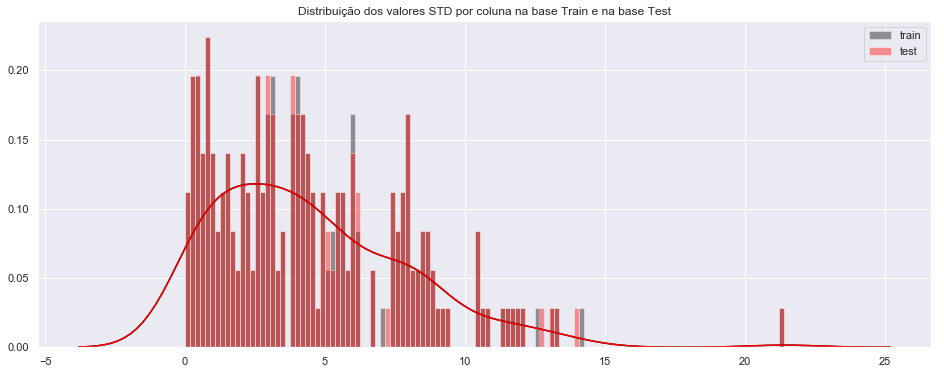

In [15]:
plt.figure(figsize=(16,6))
plt.title("Distribuição dos valores STD por coluna na base Train e na base Test")
sns.distplot(transacoesTrain[features].std(axis=0),color="black",kde=True,bins=120, label='train')
sns.distplot(transacoesTest[features].std(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend(); plt.show()

<p>Visualizações sobre o balanceamento da base<p>

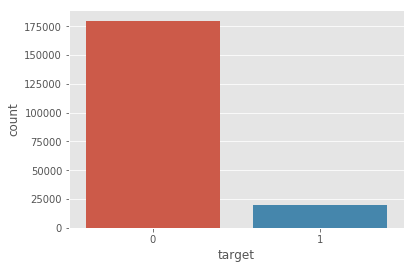

In [11]:
sns.countplot(transacoesTrain['target'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


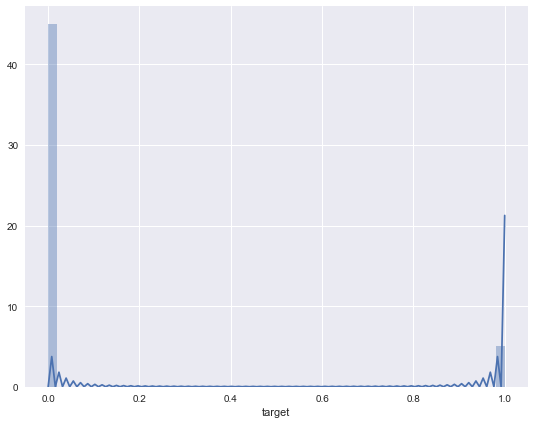

In [12]:
#Mostra que o target é desbalanceado
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(transacoesTrain['target']);

<h1>Reamostragem</h1>

<p>Como visto nos gráficos acima o modelo esta desbalanceado</p></br>
<p>Realizei a validação sem balancear e os resultados  foram inaceitaveis como mostra o gráfico da Matriz de confusão a seguir :</p>

In [15]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

NameError: name 'confusion_matrix' is not defined

<p>Agora que mostrado o impacto do desbalancemanto irei realizar a reamostragem que pode ser feita de duas formas :</p>
<img src="img/resampling.png" align=”center”>

<p>As duas formas possuem desvantagens</p>
<li>Duplicar registros aleatórios da classe minoritária pode causar superajuste</li>
<li>A remoção de registros aleatórios da classe majoritária pode causar perda de informações.</li>
<p>Recebi muitos concelhos sobre qual técnica aplicar nesta base e fiquei num dilema pois já são 200k registros diminuir parece lógico contudo posso perder dados importantes ,que para mim é mais importante </p></br>
<p>Obtive melhores resultados via Under </p>

<h2>Reamostragem por Undersampling</h2>

In [16]:
# Iremos dividir a base em target 1 e target 0
count_class_0, count_class_1 = transacoesTrain.target.value_counts()

# Divide
df_class_0 = transacoesTrain[transacoesTrain['target'] == 0]
df_class_1 = transacoesTrain[transacoesTrain['target'] == 1]


Random under-sampling:
1    20098
0    20098
Name: target, dtype: int64


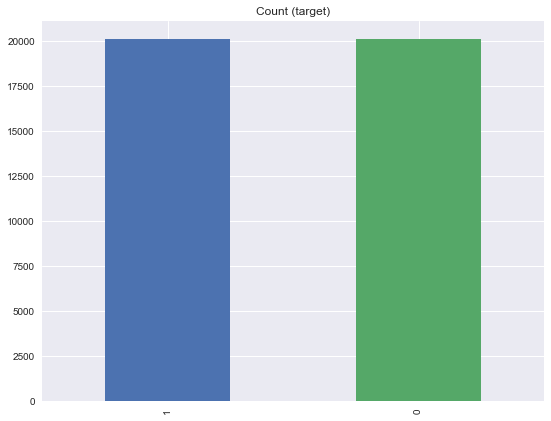

In [17]:
df_class_0_under = df_class_0.sample(count_class_1)
df_base_train_balanceada_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_base_train_balanceada_under.target.value_counts())

df_base_train_balanceada_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [18]:
#Quantidade final de registros
df_base_train_balanceada_under.shape

(40196, 202)

<h1>MODELOS</h1>

<h2>Hodout</h2>

In [19]:
#HOLDOUT
from sklearn.model_selection import train_test_split
#Eliminado o que não sera usado
a_under = df_base_train_balanceada_under.drop(['target'], axis=1)
a_under =a_under.drop(['ID_code'], axis=1)
# 70% Train and 30% Test
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(a_under, df_base_train_balanceada_under['target'], test_size=0.3)

In [20]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(a_under, df_base_train_balanceada_under['target'], test_size=0.3, random_state=42)

<h2>Grid Search</h2>

<h3>Otimização de hiperparâmetros</h3><br>
<p>Otimização de hiperparâmetros é quando escolhemos um conjunto de hiperparâmetros ótimos para um algoritmo de aprendizado</p>
<p>Um hiperparâmetro é um parâmetro cujo valor é usado para controlar o processo de aprendizagem</p>

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [22]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [24]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_under, y_train_under)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

<h2>Modelo Randon Forest</h2>

In [26]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf_under=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=8, criterion='entropy')
#Train the model using the training sets y_pred=clf.predict(X_test)
clf_under.fit(X_train_under,y_train_under)
y_pred_under=clf_under.predict(X_test_under)

In [27]:
y_test_under.head()

182562    0
79999     1
183269    1
65280     0
130999    1
Name: target, dtype: int64

<h1>Métricas</h1>

<h2>Métricas Under + Holdout + Modelo Randon Forest </h2>

In [28]:
X_train_under.shape, y_train_under.shape ,X_test_under.shape, y_test_under.shape ,y_pred_under.shape

((28137, 200), (28137,), (12059, 200), (12059,), (12059,))

<p>ACURACIA: o quanto a arvore bateu </p>

In [29]:
#Importar o módulo de métricas scikit-learn para o cálculo de precisão
from sklearn import metrics
# Acuracy
metrics.accuracy_score(y_test_under, y_pred_under)

0.7631644414959781

<p>SCORE Para saber quão bem o modelo irá generalizar ou seja, ela serve para saber se o modelo será efetivo ao receber um dado que ele nunca viu na vida</p>

In [30]:
clf_under.score(X_train_under, y_train_under)

0.8700998685005509

<h3>Matriz de Confusão</h3>

In [31]:
pd.crosstab(y_test_under,y_pred_under,rownames=['Real'],colnames=['Predito'],margins=True)

Predito     0     1    All
Real                      
0        4825  1184   6009
1        1672  4378   6050
All      6497  5562  12059

In [32]:
#O Método confusion_matrix retorna a matriz de confusão
from sklearn.metrics import confusion_matrix 
#Verdadeiro Positivo,Falso Positivo, Falso Negativo e Verdadeiro Negativo
confusion_matrix(y_pred_under,y_pred_under)


array([[6497,    0],
       [   0, 5562]])

<h3>Visualização da matriz</h3>

Confusion matrix:
 [[6497    0]
 [   0 5562]]


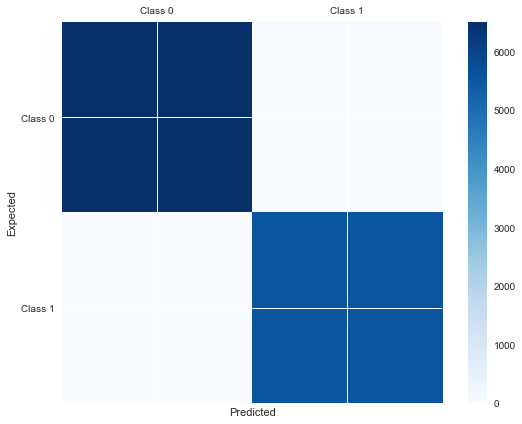

In [33]:
conf_mat = confusion_matrix(y_true=y_pred_under, y_pred=y_pred_under)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

<h1>Visualização do Random Forest</h1>

<h3>Ordem de importância dos dados analizados no modelo</h3>

In [42]:
#Mede a importância de cada feature
features = X_train_under
features_importance = zip(clf_under.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

var_81: 3.765127%
var_139: 3.263678%
var_12: 2.332249%
var_110: 2.182143%
var_53: 2.081626%
var_26: 1.955855%
var_6: 1.948732%
var_148: 1.658585%
var_146: 1.656731%
var_174: 1.645971%
var_165: 1.599689%
var_166: 1.549859%
var_109: 1.531106%
var_80: 1.527073%
var_179: 1.483995%
var_99: 1.462466%
var_0: 1.418841%
var_13: 1.359405%
var_21: 1.328153%
var_76: 1.318585%
var_78: 1.269986%
var_133: 1.230026%
var_164: 1.206938%
var_198: 1.141876%
var_22: 1.134311%
var_190: 1.126012%
var_1: 1.100071%
var_44: 1.060278%
var_170: 1.047105%
var_94: 1.034666%
var_2: 1.007080%
var_33: 0.950148%
var_40: 0.904593%
var_34: 0.894302%
var_108: 0.849231%
var_177: 0.828033%
var_154: 0.789520%
var_191: 0.753838%
var_18: 0.741201%
var_192: 0.693256%
var_184: 0.672692%
var_92: 0.665501%
var_5: 0.622509%
var_86: 0.614115%
var_115: 0.606056%
var_75: 0.605115%
var_67: 0.577814%
var_121: 0.574872%
var_169: 0.567828%
var_89: 0.550733%
var_149: 0.540576%
var_9: 0.525611%
var_36: 0.488263%
var_95: 0.485757%
var_172: 0

<h3>Imprimir as árvores e as regras geradas</h3>

In [41]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets, ensemble

def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data

           # left: index of left child (if any)
             # right: índice do filho certo (se houver)
             # recurso: índice do recurso para verificar
             # th: o limite para comparar com
             # value: valores associados a classes

             # para classificador, o valor é 0, exceto o índice da classe para retornar
            class_idx = numpy.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))    



print_decision_rules(clf_under)

TREE: 0
0 NODE: if feature[154] < -0.6351500153541565 then next=1 else next=116
1 NODE: if feature[12] < 13.769800186157227 then next=2 else next=43
2 NODE: if feature[183] < 6.573550224304199 then next=3 else next=22
3 NODE: if feature[32] < -4.610249996185303 then next=4 else next=5
4 LEAF: return class=0
5 NODE: if feature[15] < 13.953149795532227 then next=6 else next=9
6 NODE: if feature[131] < -0.025199994444847107 then next=7 else next=8
7 LEAF: return class=1
8 LEAF: return class=0
9 NODE: if feature[156] < 13.928699493408203 then next=10 else next=17
10 NODE: if feature[94] < 9.797300338745117 then next=11 else next=14
11 NODE: if feature[181] < 12.872049331665039 then next=12 else next=13
12 LEAF: return class=1
13 LEAF: return class=0
14 NODE: if feature[79] < 16.52090072631836 then next=15 else next=16
15 LEAF: return class=1
16 LEAF: return class=0
17 NODE: if feature[5] < -10.298099517822266 then next=18 else next=21
18 NODE: if feature[182] < -8.767200469970703 then next

32 LEAF: return class=1
33 NODE: if feature[86] < -1.3242000341415405 then next=34 else next=49
34 NODE: if feature[179] < 4.876799583435059 then next=35 else next=42
35 NODE: if feature[143] < 16.875699996948242 then next=36 else next=39
36 NODE: if feature[0] < 14.753250122070312 then next=37 else next=38
37 LEAF: return class=1
38 LEAF: return class=1
39 NODE: if feature[151] < 7.210000038146973 then next=40 else next=41
40 LEAF: return class=0
41 LEAF: return class=1
42 NODE: if feature[154] < 7.832650184631348 then next=43 else next=46
43 NODE: if feature[61] < -20.68255043029785 then next=44 else next=45
44 LEAF: return class=1
45 LEAF: return class=1
46 NODE: if feature[171] < -10.044750213623047 then next=47 else next=48
47 LEAF: return class=0
48 LEAF: return class=1
49 NODE: if feature[113] < 5.742799758911133 then next=50 else next=57
50 NODE: if feature[100] < -9.536749839782715 then next=51 else next=54
51 NODE: if feature[198] < 15.345849990844727 then next=52 else next=5

110 LEAF: return class=0
111 NODE: if feature[119] < -1.3612000942230225 then next=112 else next=115
112 NODE: if feature[89] < 4.281399726867676 then next=113 else next=114
113 LEAF: return class=0
114 LEAF: return class=1
115 NODE: if feature[94] < 7.828649997711182 then next=116 else next=117
116 LEAF: return class=1
117 LEAF: return class=1
118 NODE: if feature[139] < -4.364749908447266 then next=119 else next=134
119 NODE: if feature[120] < 22.748149871826172 then next=120 else next=127
120 NODE: if feature[189] < 0.5162500143051147 then next=121 else next=124
121 NODE: if feature[117] < 25.68910026550293 then next=122 else next=123
122 LEAF: return class=1
123 LEAF: return class=1
124 NODE: if feature[40] < -11.99845027923584 then next=125 else next=126
125 LEAF: return class=1
126 LEAF: return class=1
127 NODE: if feature[147] < -4.47344970703125 then next=128 else next=131
128 NODE: if feature[154] < 3.4845499992370605 then next=129 else next=130
129 LEAF: return class=1
130 LE

186 NODE: if feature[103] < 1.6052500009536743 then next=187 else next=188
187 LEAF: return class=1
188 LEAF: return class=0
189 NODE: if feature[80] < -6.498499870300293 then next=190 else next=193
190 NODE: if feature[136] < 14.35004997253418 then next=191 else next=192
191 LEAF: return class=1
192 LEAF: return class=1
193 NODE: if feature[149] < 0.20180000364780426 then next=194 else next=195
194 LEAF: return class=0
195 LEAF: return class=0
196 NODE: if feature[179] < 5.059999942779541 then next=197 else next=204
197 NODE: if feature[86] < -3.6238999366760254 then next=198 else next=201
198 NODE: if feature[29] < 6.497900009155273 then next=199 else next=200
199 LEAF: return class=1
200 LEAF: return class=1
201 NODE: if feature[81] < 13.17959976196289 then next=202 else next=203
202 LEAF: return class=1
203 LEAF: return class=1
204 NODE: if feature[125] < 12.501500129699707 then next=205 else next=208
205 NODE: if feature[34] < 12.158199310302734 then next=206 else next=207
206 LEA

65 NODE: if feature[182] < 17.732101440429688 then next=66 else next=73
66 NODE: if feature[44] < 4.276199817657471 then next=67 else next=70
67 NODE: if feature[174] < 12.686050415039062 then next=68 else next=69
68 LEAF: return class=1
69 LEAF: return class=1
70 NODE: if feature[116] < -0.008249999955296516 then next=71 else next=72
71 LEAF: return class=1
72 LEAF: return class=1
73 NODE: if feature[91] < 6.913599967956543 then next=74 else next=77
74 NODE: if feature[91] < 6.87214994430542 then next=75 else next=76
75 LEAF: return class=0
76 LEAF: return class=1
77 LEAF: return class=0
78 NODE: if feature[56] < 8.417550086975098 then next=79 else next=80
79 LEAF: return class=1
80 NODE: if feature[154] < -0.5501999855041504 then next=81 else next=88
81 NODE: if feature[188] < 14.324350357055664 then next=82 else next=85
82 NODE: if feature[39] < -2.671600103378296 then next=83 else next=84
83 LEAF: return class=0
84 LEAF: return class=1
85 NODE: if feature[192] < 0.5458999872207642 

112 LEAF: return class=0
113 LEAF: return class=1
114 NODE: if feature[37] < 9.124500274658203 then next=115 else next=130
115 NODE: if feature[184] < 24.21674919128418 then next=116 else next=123
116 NODE: if feature[94] < 15.652149200439453 then next=117 else next=120
117 NODE: if feature[141] < 13.237600326538086 then next=118 else next=119
118 LEAF: return class=1
119 LEAF: return class=1
120 NODE: if feature[175] < 9.22344970703125 then next=121 else next=122
121 LEAF: return class=1
122 LEAF: return class=1
123 NODE: if feature[3] < 10.027999877929688 then next=124 else next=127
124 NODE: if feature[131] < 1.270400047302246 then next=125 else next=126
125 LEAF: return class=1
126 LEAF: return class=0
127 NODE: if feature[199] < -8.410299301147461 then next=128 else next=129
128 LEAF: return class=1
129 LEAF: return class=0
130 NODE: if feature[6] < 6.689350128173828 then next=131 else next=136
131 NODE: if feature[84] < 4.4870500564575195 then next=132 else next=133
132 LEAF: ret

174 LEAF: return class=0
175 LEAF: return class=0
176 NODE: if feature[194] < 22.474550247192383 then next=177 else next=178
177 LEAF: return class=1
178 LEAF: return class=1
179 NODE: if feature[1] < 6.037300109863281 then next=180 else next=187
180 NODE: if feature[179] < 3.2276999950408936 then next=181 else next=184
181 NODE: if feature[15] < 13.93809986114502 then next=182 else next=183
182 LEAF: return class=0
183 LEAF: return class=0
184 NODE: if feature[92] < 4.433199882507324 then next=185 else next=186
185 LEAF: return class=1
186 LEAF: return class=0
187 NODE: if feature[104] < 16.056148529052734 then next=188 else next=191
188 NODE: if feature[174] < 9.534250259399414 then next=189 else next=190
189 LEAF: return class=1
190 LEAF: return class=1
191 LEAF: return class=0
192 NODE: if feature[13] < 1.9112499952316284 then next=193 else next=226
193 NODE: if feature[68] < 5.029449939727783 then next=194 else next=217
194 NODE: if feature[150] < 13.88534927368164 then next=195 e

18 NODE: if feature[9] < 9.601750373840332 then next=19 else next=22
19 NODE: if feature[87] < 7.736049652099609 then next=20 else next=21
20 LEAF: return class=0
21 LEAF: return class=0
22 LEAF: return class=1
23 LEAF: return class=0
24 NODE: if feature[158] < 30.577098846435547 then next=25 else next=48
25 NODE: if feature[12] < 13.603699684143066 then next=26 else next=33
26 NODE: if feature[177] < 8.15464973449707 then next=27 else next=28
27 LEAF: return class=0
28 NODE: if feature[88] < 9.322000503540039 then next=29 else next=32
29 NODE: if feature[8] < 0.3163999915122986 then next=30 else next=31
30 LEAF: return class=0
31 LEAF: return class=1
32 LEAF: return class=1
33 NODE: if feature[139] < 3.4156999588012695 then next=34 else next=41
34 NODE: if feature[23] < 3.2594499588012695 then next=35 else next=38
35 NODE: if feature[139] < -3.7361998558044434 then next=36 else next=37
36 LEAF: return class=1
37 LEAF: return class=1
38 NODE: if feature[90] < -22.166351318359375 then n

99 LEAF: return class=1
100 NODE: if feature[140] < 2.617650032043457 then next=101 else next=104
101 NODE: if feature[115] < -0.744949996471405 then next=102 else next=103
102 LEAF: return class=0
103 LEAF: return class=1
104 NODE: if feature[66] < 6.108550071716309 then next=105 else next=106
105 LEAF: return class=1
106 LEAF: return class=1
107 NODE: if feature[18] < 27.394901275634766 then next=108 else next=115
108 NODE: if feature[6] < 6.982800006866455 then next=109 else next=112
109 NODE: if feature[44] < 1.539099931716919 then next=110 else next=111
110 LEAF: return class=1
111 LEAF: return class=0
112 NODE: if feature[163] < 20.582599639892578 then next=113 else next=114
113 LEAF: return class=1
114 LEAF: return class=1
115 NODE: if feature[157] < -6.583499908447266 then next=116 else next=119
116 NODE: if feature[74] < 28.44649887084961 then next=117 else next=118
117 LEAF: return class=0
118 LEAF: return class=1
119 NODE: if feature[131] < 0.5874999761581421 then next=120 e

178 NODE: if feature[163] < 15.65880012512207 then next=179 else next=182
179 NODE: if feature[106] < 10.690799713134766 then next=180 else next=181
180 LEAF: return class=1
181 LEAF: return class=1
182 NODE: if feature[38] < 2.6499500274658203 then next=183 else next=184
183 LEAF: return class=0
184 LEAF: return class=1
185 NODE: if feature[174] < 17.40570068359375 then next=186 else next=189
186 NODE: if feature[149] < -0.09884999692440033 then next=187 else next=188
187 LEAF: return class=1
188 LEAF: return class=1
189 NODE: if feature[112] < 5.440899848937988 then next=190 else next=191
190 LEAF: return class=1
191 LEAF: return class=1
192 NODE: if feature[114] < 2.3989500999450684 then next=193 else next=200
193 NODE: if feature[46] < 9.136699676513672 then next=194 else next=197
194 NODE: if feature[172] < 13.692150115966797 then next=195 else next=196
195 LEAF: return class=1
196 LEAF: return class=0
197 NODE: if feature[134] < -13.853300094604492 then next=198 else next=199
198

199 NODE: if feature[174] < 13.282400131225586 then next=200 else next=211
200 NODE: if feature[65] < 0.4841499924659729 then next=201 else next=206
201 NODE: if feature[29] < 6.57295036315918 then next=202 else next=205
202 NODE: if feature[27] < -0.27665001153945923 then next=203 else next=204
203 LEAF: return class=1
204 LEAF: return class=1
205 LEAF: return class=0
206 NODE: if feature[126] < 12.224849700927734 then next=207 else next=210
207 NODE: if feature[105] < 5.122900009155273 then next=208 else next=209
208 LEAF: return class=1
209 LEAF: return class=0
210 LEAF: return class=1
211 NODE: if feature[171] < 0.5511999726295471 then next=212 else next=219
212 NODE: if feature[99] < -0.8920999765396118 then next=213 else next=216
213 NODE: if feature[151] < 12.29520034790039 then next=214 else next=215
214 LEAF: return class=0
215 LEAF: return class=0
216 NODE: if feature[55] < 4.534249782562256 then next=217 else next=218
217 LEAF: return class=0
218 LEAF: return class=1
219 NOD

53 NODE: if feature[118] < -7.160249710083008 then next=54 else next=57
54 NODE: if feature[148] < 3.7285499572753906 then next=55 else next=56
55 LEAF: return class=1
56 LEAF: return class=0
57 NODE: if feature[152] < 11.98799991607666 then next=58 else next=59
58 LEAF: return class=1
59 LEAF: return class=1
60 NODE: if feature[21] < 3.262199878692627 then next=61 else next=80
61 NODE: if feature[100] < 7.675000190734863 then next=62 else next=73
62 NODE: if feature[19] < 14.624750137329102 then next=63 else next=68
63 NODE: if feature[98] < 0.10085000097751617 then next=64 else next=65
64 LEAF: return class=0
65 NODE: if feature[173] < -13.008249282836914 then next=66 else next=67
66 LEAF: return class=0
67 LEAF: return class=1
68 NODE: if feature[123] < -1.9660999774932861 then next=69 else next=70
69 LEAF: return class=0
70 NODE: if feature[40] < -14.667400360107422 then next=71 else next=72
71 LEAF: return class=0
72 LEAF: return class=1
73 NODE: if feature[56] < 13.14075088500976

247 LEAF: return class=1
248 NODE: if feature[57] < 5.641200065612793 then next=249 else next=250
249 LEAF: return class=1
250 LEAF: return class=1
251 NODE: if feature[83] < -1.5813500881195068 then next=252 else next=255
252 NODE: if feature[133] < 7.141650199890137 then next=253 else next=254
253 LEAF: return class=1
254 LEAF: return class=1
255 NODE: if feature[175] < 7.766149997711182 then next=256 else next=257
256 LEAF: return class=1
257 LEAF: return class=0
258 NODE: if feature[191] < 12.315799713134766 then next=259 else next=266
259 NODE: if feature[21] < 9.959650039672852 then next=260 else next=263
260 NODE: if feature[44] < -2.2013001441955566 then next=261 else next=262
261 LEAF: return class=1
262 LEAF: return class=0
263 NODE: if feature[123] < -2.880549907684326 then next=264 else next=265
264 LEAF: return class=1
265 LEAF: return class=0
266 NODE: if feature[2] < 6.940000057220459 then next=267 else next=270
267 NODE: if feature[138] < -2.185500144958496 then next=26

254 NODE: if feature[150] < 18.986949920654297 then next=255 else next=258
255 NODE: if feature[134] < 3.8397998809814453 then next=256 else next=257
256 LEAF: return class=1
257 LEAF: return class=1
258 NODE: if feature[164] < 3.812000274658203 then next=259 else next=260
259 LEAF: return class=0
260 LEAF: return class=1
261 NODE: if feature[164] < 2.3924999237060547 then next=262 else next=265
262 NODE: if feature[78] < 8.709749221801758 then next=263 else next=264
263 LEAF: return class=0
264 LEAF: return class=1
265 NODE: if feature[97] < 46.0942497253418 then next=266 else next=267
266 LEAF: return class=1
267 LEAF: return class=0
268 NODE: if feature[114] < 4.4404497146606445 then next=269 else next=276
269 NODE: if feature[28] < 5.095250129699707 then next=270 else next=273
270 NODE: if feature[174] < 21.993749618530273 then next=271 else next=272
271 LEAF: return class=1
272 LEAF: return class=1
273 NODE: if feature[26] < -0.7731499671936035 then next=274 else next=275
274 LEAF

72 NODE: if feature[151] < 10.286199569702148 then next=73 else next=74
73 LEAF: return class=0
74 LEAF: return class=1
75 LEAF: return class=1
76 LEAF: return class=1
77 NODE: if feature[164] < 6.7694501876831055 then next=78 else next=133
78 NODE: if feature[165] < 11.665550231933594 then next=79 else next=102
79 NODE: if feature[162] < 7.117549896240234 then next=80 else next=93
80 NODE: if feature[96] < 10.584650039672852 then next=81 else next=86
81 NODE: if feature[177] < 7.906200408935547 then next=82 else next=83
82 LEAF: return class=1
83 NODE: if feature[120] < 11.438199996948242 then next=84 else next=85
84 LEAF: return class=0
85 LEAF: return class=1
86 NODE: if feature[154] < 2.303150177001953 then next=87 else next=90
87 NODE: if feature[28] < 5.347750186920166 then next=88 else next=89
88 LEAF: return class=1
89 LEAF: return class=1
90 NODE: if feature[38] < 18.751998901367188 then next=91 else next=92
91 LEAF: return class=1
92 LEAF: return class=1
93 NODE: if feature[4

209 NODE: if feature[192] < 1.4890000820159912 then next=210 else next=239
210 NODE: if feature[157] < -4.113800048828125 then next=211 else next=226
211 NODE: if feature[113] < 7.2251996994018555 then next=212 else next=219
212 NODE: if feature[49] < 5.2947998046875 then next=213 else next=216
213 NODE: if feature[90] < -15.78695011138916 then next=214 else next=215
214 LEAF: return class=1
215 LEAF: return class=0
216 NODE: if feature[1] < 5.84404993057251 then next=217 else next=218
217 LEAF: return class=1
218 LEAF: return class=0
219 NODE: if feature[173] < 6.930850028991699 then next=220 else next=223
220 NODE: if feature[148] < 4.052700042724609 then next=221 else next=222
221 LEAF: return class=1
222 LEAF: return class=0
223 NODE: if feature[96] < 21.291351318359375 then next=224 else next=225
224 LEAF: return class=1
225 LEAF: return class=1
226 NODE: if feature[112] < 5.236900329589844 then next=227 else next=232
227 NODE: if feature[16] < 15.452150344848633 then next=228 els

193 LEAF: return class=0
194 LEAF: return class=1
195 NODE: if feature[115] < 1.2732000350952148 then next=196 else next=197
196 LEAF: return class=1
197 NODE: if feature[191] < 14.88800048828125 then next=198 else next=199
198 LEAF: return class=1
199 LEAF: return class=0
200 NODE: if feature[36] < -4.273600101470947 then next=201 else next=202
201 LEAF: return class=1
202 NODE: if feature[94] < 13.0378999710083 then next=203 else next=246
203 NODE: if feature[67] < 21.648601531982422 then next=204 else next=229
204 NODE: if feature[144] < 10.085500717163086 then next=205 else next=218
205 NODE: if feature[141] < -9.690349578857422 then next=206 else next=211
206 NODE: if feature[32] < 1.4534000158309937 then next=207 else next=208
207 LEAF: return class=1
208 NODE: if feature[190] < 4.188549995422363 then next=209 else next=210
209 LEAF: return class=1
210 LEAF: return class=0
211 NODE: if feature[143] < 11.093549728393555 then next=212 else next=215
212 NODE: if feature[35] < -5.666

252 NODE: if feature[34] < 10.246999740600586 then next=253 else next=254
253 LEAF: return class=0
254 LEAF: return class=1
255 NODE: if feature[173] < 4.433500289916992 then next=256 else next=271
256 NODE: if feature[94] < 11.235799789428711 then next=257 else next=264
257 NODE: if feature[137] < 12.782150268554688 then next=258 else next=261
258 NODE: if feature[57] < 6.47035026550293 then next=259 else next=260
259 LEAF: return class=0
260 LEAF: return class=0
261 NODE: if feature[18] < 12.430549621582031 then next=262 else next=263
262 LEAF: return class=0
263 LEAF: return class=1
264 NODE: if feature[18] < 30.076099395751953 then next=265 else next=268
265 NODE: if feature[164] < 4.656750202178955 then next=266 else next=267
266 LEAF: return class=1
267 LEAF: return class=1
268 NODE: if feature[92] < 12.019500732421875 then next=269 else next=270
269 LEAF: return class=1
270 LEAF: return class=1
271 NODE: if feature[145] < -2.7993998527526855 then next=272 else next=273
272 LEAF:

252 LEAF: return class=1
253 NODE: if feature[23] < 3.2414000034332275 then next=254 else next=257
254 NODE: if feature[118] < 0.9905000329017639 then next=255 else next=256
255 LEAF: return class=1
256 LEAF: return class=1
257 NODE: if feature[52] < 0.816349983215332 then next=258 else next=259
258 LEAF: return class=0
259 LEAF: return class=1
260 NODE: if feature[125] < 12.572799682617188 then next=261 else next=278
261 NODE: if feature[52] < 8.571649551391602 then next=262 else next=277
262 NODE: if feature[43] < 11.151399612426758 then next=263 else next=270
263 NODE: if feature[166] < 2.9254000186920166 then next=264 else next=267
264 NODE: if feature[108] < 14.242899894714355 then next=265 else next=266
265 LEAF: return class=1
266 LEAF: return class=1
267 NODE: if feature[114] < 2.08804988861084 then next=268 else next=269
268 LEAF: return class=0
269 LEAF: return class=1
270 NODE: if feature[37] < 2.4474000930786133 then next=271 else next=274
271 NODE: if feature[117] < 24.696

223 NODE: if feature[179] < 7.751150131225586 then next=224 else next=249
224 NODE: if feature[196] < 13.562549591064453 then next=225 else next=240
225 NODE: if feature[121] < 8.709699630737305 then next=226 else next=233
226 NODE: if feature[124] < 2.942850112915039 then next=227 else next=230
227 NODE: if feature[29] < 3.791800022125244 then next=228 else next=229
228 LEAF: return class=0
229 LEAF: return class=1
230 NODE: if feature[34] < 11.565950393676758 then next=231 else next=232
231 LEAF: return class=1
232 LEAF: return class=1
233 NODE: if feature[2] < 16.042449951171875 then next=234 else next=237
234 NODE: if feature[191] < 12.823299407958984 then next=235 else next=236
235 LEAF: return class=0
236 LEAF: return class=1
237 NODE: if feature[136] < 19.474449157714844 then next=238 else next=239
238 LEAF: return class=1
239 LEAF: return class=1
240 NODE: if feature[49] < 5.953800201416016 then next=241 else next=244
241 NODE: if feature[188] < 17.77669906616211 then next=242 

171 NODE: if feature[22] < 9.571100234985352 then next=172 else next=175
172 NODE: if feature[174] < 4.79794979095459 then next=173 else next=174
173 LEAF: return class=1
174 LEAF: return class=0
175 NODE: if feature[197] < 7.246950149536133 then next=176 else next=177
176 LEAF: return class=1
177 LEAF: return class=1
178 NODE: if feature[183] < 3.5570998191833496 then next=179 else next=182
179 NODE: if feature[20] < 20.42115020751953 then next=180 else next=181
180 LEAF: return class=1
181 LEAF: return class=0
182 NODE: if feature[35] < -1.8812999725341797 then next=183 else next=184
183 LEAF: return class=0
184 LEAF: return class=1
185 NODE: if feature[133] < 7.4519500732421875 then next=186 else next=191
186 NODE: if feature[55] < 3.2311999797821045 then next=187 else next=188
187 LEAF: return class=0
188 NODE: if feature[154] < -1.8457499742507935 then next=189 else next=190
189 LEAF: return class=1
190 LEAF: return class=1
191 NODE: if feature[161] < 5.408149719238281 then next=1

106 NODE: if feature[199] < -3.334050178527832 then next=107 else next=114
107 NODE: if feature[155] < -13.331600189208984 then next=108 else next=109
108 LEAF: return class=0
109 NODE: if feature[101] < 22.811351776123047 then next=110 else next=113
110 NODE: if feature[62] < 3.394350051879883 then next=111 else next=112
111 LEAF: return class=1
112 LEAF: return class=1
113 LEAF: return class=0
114 LEAF: return class=1
115 NODE: if feature[77] < 19.03190040588379 then next=116 else next=141
116 NODE: if feature[194] < 22.70775032043457 then next=117 else next=132
117 NODE: if feature[158] < 11.434650421142578 then next=118 else next=125
118 NODE: if feature[47] < -25.498350143432617 then next=119 else next=122
119 NODE: if feature[197] < 8.6808500289917 then next=120 else next=121
120 LEAF: return class=1
121 LEAF: return class=0
122 NODE: if feature[38] < 11.702699661254883 then next=123 else next=124
123 LEAF: return class=1
124 LEAF: return class=1
125 NODE: if feature[110] < 9.614

78 NODE: if feature[189] < -0.6503000259399414 then next=79 else next=80
79 LEAF: return class=1
80 NODE: if feature[118] < -3.9370498657226562 then next=81 else next=82
81 LEAF: return class=1
82 LEAF: return class=0
83 NODE: if feature[103] < 1.3433001041412354 then next=84 else next=91
84 NODE: if feature[75] < 17.308849334716797 then next=85 else next=88
85 NODE: if feature[62] < 0.1485999971628189 then next=86 else next=87
86 LEAF: return class=0
87 LEAF: return class=1
88 NODE: if feature[142] < 10.59469985961914 then next=89 else next=90
89 LEAF: return class=0
90 LEAF: return class=0
91 NODE: if feature[21] < 5.507450103759766 then next=92 else next=95
92 NODE: if feature[88] < 7.961349964141846 then next=93 else next=94
93 LEAF: return class=1
94 LEAF: return class=1
95 NODE: if feature[40] < -1.448449969291687 then next=96 else next=97
96 LEAF: return class=1
97 LEAF: return class=1
98 NODE: if feature[119] < 8.385149955749512 then next=99 else next=112
99 NODE: if feature[49

287 NODE: if feature[100] < -14.331649780273438 then next=288 else next=293
288 NODE: if feature[49] < 8.36614990234375 then next=289 else next=290
289 LEAF: return class=0
290 NODE: if feature[80] < 13.278850555419922 then next=291 else next=292
291 LEAF: return class=1
292 LEAF: return class=0
293 LEAF: return class=1
294 NODE: if feature[115] < 6.575599670410156 then next=295 else next=304
295 NODE: if feature[184] < -2.0956499576568604 then next=296 else next=299
296 NODE: if feature[89] < 8.966150283813477 then next=297 else next=298
297 LEAF: return class=0
298 LEAF: return class=1
299 NODE: if feature[70] < -0.12825000286102295 then next=300 else next=301
300 LEAF: return class=0
301 NODE: if feature[95] < -0.8798500299453735 then next=302 else next=303
302 LEAF: return class=0
303 LEAF: return class=1
304 LEAF: return class=0
TREE: 102
0 NODE: if feature[164] < 6.325050354003906 then next=1 else next=156
1 NODE: if feature[26] < 2.846449851989746 then next=2 else next=97
2 NODE

41 LEAF: return class=1
42 LEAF: return class=1
43 NODE: if feature[58] < -1.837149977684021 then next=44 else next=45
44 LEAF: return class=1
45 NODE: if feature[133] < 7.128999710083008 then next=46 else next=47
46 LEAF: return class=0
47 LEAF: return class=1
48 NODE: if feature[63] < -1.5755000114440918 then next=49 else next=50
49 LEAF: return class=1
50 NODE: if feature[167] < -12.634849548339844 then next=51 else next=58
51 NODE: if feature[98] < 2.65939998626709 then next=52 else next=57
52 NODE: if feature[84] < -4.684000015258789 then next=53 else next=54
53 LEAF: return class=0
54 NODE: if feature[157] < -4.288650035858154 then next=55 else next=56
55 LEAF: return class=1
56 LEAF: return class=0
57 LEAF: return class=0
58 NODE: if feature[99] < -2.0742499828338623 then next=59 else next=60
59 LEAF: return class=1
60 NODE: if feature[172] < 23.80379867553711 then next=61 else next=64
61 NODE: if feature[91] < 7.064899921417236 then next=62 else next=63
62 LEAF: return class=1


122 LEAF: return class=0
123 LEAF: return class=0
124 NODE: if feature[68] < 5.020549774169922 then next=125 else next=126
125 LEAF: return class=1
126 LEAF: return class=0
127 NODE: if feature[110] < 8.786849975585938 then next=128 else next=147
128 NODE: if feature[125] < 13.03285026550293 then next=129 else next=140
129 NODE: if feature[148] < 3.839900016784668 then next=130 else next=135
130 NODE: if feature[194] < 13.873449325561523 then next=131 else next=132
131 LEAF: return class=1
132 NODE: if feature[143] < 16.546001434326172 then next=133 else next=134
133 LEAF: return class=1
134 LEAF: return class=0
135 NODE: if feature[106] < 12.533949851989746 then next=136 else next=139
136 NODE: if feature[169] < 5.037599563598633 then next=137 else next=138
137 LEAF: return class=1
138 LEAF: return class=1
139 LEAF: return class=1
140 NODE: if feature[85] < 21.46685028076172 then next=141 else next=146
141 NODE: if feature[54] < -6.530399799346924 then next=142 else next=143
142 LEAF:

92 NODE: if feature[192] < 0.6725499629974365 then next=93 else next=108
93 NODE: if feature[146] < 10.046499252319336 then next=94 else next=101
94 NODE: if feature[139] < 6.747699737548828 then next=95 else next=98
95 NODE: if feature[159] < 15.143199920654297 then next=96 else next=97
96 LEAF: return class=1
97 LEAF: return class=1
98 NODE: if feature[159] < 17.14859962463379 then next=99 else next=100
99 LEAF: return class=0
100 LEAF: return class=1
101 NODE: if feature[12] < 13.902599334716797 then next=102 else next=105
102 NODE: if feature[76] < 17.29344940185547 then next=103 else next=104
103 LEAF: return class=1
104 LEAF: return class=0
105 NODE: if feature[74] < 20.645599365234375 then next=106 else next=107
106 LEAF: return class=0
107 LEAF: return class=0
108 NODE: if feature[76] < -3.2836499214172363 then next=109 else next=116
109 NODE: if feature[135] < 9.144649505615234 then next=110 else next=113
110 NODE: if feature[108] < 14.514849662780762 then next=111 else next=1

225 LEAF: return class=1
226 LEAF: return class=0
227 NODE: if feature[37] < 5.5530500411987305 then next=228 else next=231
228 NODE: if feature[50] < 11.919650077819824 then next=229 else next=230
229 LEAF: return class=0
230 LEAF: return class=0
231 NODE: if feature[155] < 1.2172999382019043 then next=232 else next=233
232 LEAF: return class=1
233 LEAF: return class=1
234 NODE: if feature[132] < 8.0516996383667 then next=235 else next=254
235 NODE: if feature[124] < 10.642499923706055 then next=236 else next=253
236 NODE: if feature[54] < -15.333250045776367 then next=237 else next=242
237 NODE: if feature[111] < 7.630450248718262 then next=238 else next=239
238 LEAF: return class=1
239 NODE: if feature[58] < 6.626999855041504 then next=240 else next=241
240 LEAF: return class=1
241 LEAF: return class=0
242 NODE: if feature[198] < 12.141249656677246 then next=243 else next=248
243 NODE: if feature[148] < 3.848449945449829 then next=244 else next=245
244 LEAF: return class=1
245 NODE:

9 NODE: if feature[41] < 20.780799865722656 then next=10 else next=11
10 LEAF: return class=1
11 NODE: if feature[118] < -16.248748779296875 then next=12 else next=13
12 LEAF: return class=0
13 LEAF: return class=1
14 NODE: if feature[81] < 11.848299980163574 then next=15 else next=36
15 NODE: if feature[154] < 10.655699729919434 then next=16 else next=25
16 NODE: if feature[174] < 8.217199325561523 then next=17 else next=18
17 LEAF: return class=1
18 NODE: if feature[31] < 10.273599624633789 then next=19 else next=22
19 NODE: if feature[199] < -1.847000002861023 then next=20 else next=21
20 LEAF: return class=1
21 LEAF: return class=1
22 NODE: if feature[45] < 30.55525016784668 then next=23 else next=24
23 LEAF: return class=1
24 LEAF: return class=0
25 NODE: if feature[194] < 20.43090057373047 then next=26 else next=31
26 NODE: if feature[154] < 15.173649787902832 then next=27 else next=30
27 NODE: if feature[196] < 8.83650016784668 then next=28 else next=29
28 LEAF: return class=1
2

96 NODE: if feature[135] < 10.840450286865234 then next=97 else next=98
97 LEAF: return class=1
98 LEAF: return class=0
99 LEAF: return class=0
100 NODE: if feature[155] < 10.09060001373291 then next=101 else next=104
101 NODE: if feature[21] < 8.097400665283203 then next=102 else next=103
102 LEAF: return class=1
103 LEAF: return class=1
104 NODE: if feature[12] < 14.114999771118164 then next=105 else next=106
105 LEAF: return class=1
106 LEAF: return class=1
107 NODE: if feature[127] < -4.024899959564209 then next=108 else next=123
108 NODE: if feature[83] < 13.907950401306152 then next=109 else next=120
109 NODE: if feature[12] < 13.818700790405273 then next=110 else next=111
110 LEAF: return class=1
111 NODE: if feature[34] < 11.939199447631836 then next=112 else next=119
112 NODE: if feature[6] < 5.240750312805176 then next=113 else next=116
113 NODE: if feature[174] < 16.844499588012695 then next=114 else next=115
114 LEAF: return class=1
115 LEAF: return class=0
116 NODE: if fea

156 NODE: if feature[86] < 11.6427001953125 then next=157 else next=160
157 NODE: if feature[139] < 2.654399871826172 then next=158 else next=159
158 LEAF: return class=1
159 LEAF: return class=0
160 LEAF: return class=1
161 NODE: if feature[47] < -23.89175033569336 then next=162 else next=163
162 LEAF: return class=0
163 NODE: if feature[161] < 5.666800022125244 then next=164 else next=165
164 LEAF: return class=0
165 LEAF: return class=1
166 NODE: if feature[0] < 7.2081499099731445 then next=167 else next=168
167 LEAF: return class=0
168 NODE: if feature[27] < -1.994149923324585 then next=169 else next=174
169 NODE: if feature[89] < 1.5876500606536865 then next=170 else next=173
170 NODE: if feature[9] < 7.665349960327148 then next=171 else next=172
171 LEAF: return class=0
172 LEAF: return class=1
173 LEAF: return class=1
174 NODE: if feature[196] < 9.53445053100586 then next=175 else next=178
175 NODE: if feature[36] < -0.6771999597549438 then next=176 else next=177
176 LEAF: retur

177 LEAF: return class=1
178 NODE: if feature[139] < -3.8145999908447266 then next=179 else next=180
179 LEAF: return class=1
180 LEAF: return class=0
181 NODE: if feature[164] < 6.724699974060059 then next=182 else next=189
182 NODE: if feature[78] < 8.607900619506836 then next=183 else next=186
183 NODE: if feature[80] < -3.435499906539917 then next=184 else next=185
184 LEAF: return class=1
185 LEAF: return class=0
186 NODE: if feature[114] < 2.7955498695373535 then next=187 else next=188
187 LEAF: return class=1
188 LEAF: return class=1
189 NODE: if feature[94] < 8.830249786376953 then next=190 else next=193
190 NODE: if feature[43] < 11.44694995880127 then next=191 else next=192
191 LEAF: return class=0
192 LEAF: return class=1
193 NODE: if feature[88] < 6.816800117492676 then next=194 else next=195
194 LEAF: return class=1
195 LEAF: return class=1
196 NODE: if feature[18] < 14.010649681091309 then next=197 else next=242
197 NODE: if feature[151] < 16.962200164794922 then next=198

143 LEAF: return class=0
144 LEAF: return class=0
145 NODE: if feature[196] < 13.096750259399414 then next=146 else next=167
146 NODE: if feature[169] < 6.155699729919434 then next=147 else next=160
147 NODE: if feature[99] < 1.4518499374389648 then next=148 else next=155
148 NODE: if feature[49] < 18.960948944091797 then next=149 else next=152
149 NODE: if feature[117] < 25.484249114990234 then next=150 else next=151
150 LEAF: return class=1
151 LEAF: return class=1
152 NODE: if feature[151] < 4.396299839019775 then next=153 else next=154
153 LEAF: return class=1
154 LEAF: return class=1
155 NODE: if feature[103] < 1.6748000383377075 then next=156 else next=157
156 LEAF: return class=1
157 NODE: if feature[167] < 4.187550067901611 then next=158 else next=159
158 LEAF: return class=1
159 LEAF: return class=0
160 NODE: if feature[31] < 7.896699905395508 then next=161 else next=162
161 LEAF: return class=1
162 NODE: if feature[145] < 9.634050369262695 then next=163 else next=166
163 NODE

246 NODE: if feature[127] < 5.1930999755859375 then next=247 else next=250
247 NODE: if feature[178] < -14.166199684143066 then next=248 else next=249
248 LEAF: return class=1
249 LEAF: return class=1
250 NODE: if feature[88] < 11.742599487304688 then next=251 else next=252
251 LEAF: return class=0
252 LEAF: return class=0
253 NODE: if feature[14] < 6.958250045776367 then next=254 else next=257
254 NODE: if feature[147] < -6.675999641418457 then next=255 else next=256
255 LEAF: return class=0
256 LEAF: return class=1
257 NODE: if feature[36] < 7.635649681091309 then next=258 else next=259
258 LEAF: return class=0
259 LEAF: return class=0
260 NODE: if feature[129] < 21.83799934387207 then next=261 else next=282
261 NODE: if feature[104] < 12.890999794006348 then next=262 else next=273
262 NODE: if feature[51] < 13.559150695800781 then next=263 else next=268
263 NODE: if feature[20] < 15.730850219726562 then next=264 else next=265
264 LEAF: return class=1
265 NODE: if feature[115] < 3.71

70 LEAF: return class=1
71 LEAF: return class=1
72 LEAF: return class=1
73 NODE: if feature[53] < 7.003849983215332 then next=74 else next=77
74 NODE: if feature[164] < 4.357649803161621 then next=75 else next=76
75 LEAF: return class=0
76 LEAF: return class=1
77 NODE: if feature[2] < 13.415949821472168 then next=78 else next=79
78 LEAF: return class=1
79 LEAF: return class=1
80 NODE: if feature[174] < 12.265199661254883 then next=81 else next=96
81 NODE: if feature[67] < 19.043251037597656 then next=82 else next=89
82 NODE: if feature[68] < 5.011750221252441 then next=83 else next=86
83 NODE: if feature[75] < 17.65424919128418 then next=84 else next=85
84 LEAF: return class=1
85 LEAF: return class=1
86 NODE: if feature[179] < 7.758749961853027 then next=87 else next=88
87 LEAF: return class=1
88 LEAF: return class=1
89 NODE: if feature[161] < 5.937299728393555 then next=90 else next=93
90 NODE: if feature[92] < 14.250850677490234 then next=91 else next=92
91 LEAF: return class=1
92 LE

271 LEAF: return class=1
272 NODE: if feature[110] < 9.995899200439453 then next=273 else next=288
273 NODE: if feature[149] < -5.4203996658325195 then next=274 else next=281
274 NODE: if feature[120] < 31.43054962158203 then next=275 else next=278
275 NODE: if feature[12] < 13.95359992980957 then next=276 else next=277
276 LEAF: return class=1
277 LEAF: return class=1
278 NODE: if feature[99] < -2.393049955368042 then next=279 else next=280
279 LEAF: return class=0
280 LEAF: return class=1
281 NODE: if feature[76] < -6.435400009155273 then next=282 else next=285
282 NODE: if feature[181] < 7.599999904632568 then next=283 else next=284
283 LEAF: return class=0
284 LEAF: return class=1
285 NODE: if feature[21] < 34.0614013671875 then next=286 else next=287
286 LEAF: return class=1
287 LEAF: return class=0
288 NODE: if feature[19] < -0.2409999966621399 then next=289 else next=290
289 LEAF: return class=0
290 NODE: if feature[113] < 10.049600601196289 then next=291 else next=292
291 LEAF:

231 NODE: if feature[118] < -19.68090057373047 then next=232 else next=233
232 LEAF: return class=1
233 LEAF: return class=1
234 LEAF: return class=0
235 NODE: if feature[50] < 13.261249542236328 then next=236 else next=249
236 NODE: if feature[42] < 11.248700141906738 then next=237 else next=242
237 NODE: if feature[65] < -9.06934928894043 then next=238 else next=239
238 LEAF: return class=0
239 NODE: if feature[136] < 4.5184502601623535 then next=240 else next=241
240 LEAF: return class=0
241 LEAF: return class=1
242 NODE: if feature[191] < 5.799799919128418 then next=243 else next=246
243 NODE: if feature[144] < 9.071449279785156 then next=244 else next=245
244 LEAF: return class=0
245 LEAF: return class=1
246 NODE: if feature[171] < -1.5024499893188477 then next=247 else next=248
247 LEAF: return class=1
248 LEAF: return class=1
249 NODE: if feature[141] < 2.571899890899658 then next=250 else next=251
250 LEAF: return class=0
251 NODE: if feature[2] < 10.939899444580078 then next=2

244 LEAF: return class=1
245 LEAF: return class=0
246 NODE: if feature[12] < 13.941650390625 then next=247 else next=268
247 NODE: if feature[172] < 12.651849746704102 then next=248 else next=255
248 NODE: if feature[91] < 6.764050006866455 then next=249 else next=252
249 NODE: if feature[24] < 9.06624984741211 then next=250 else next=251
250 LEAF: return class=1
251 LEAF: return class=0
252 NODE: if feature[48] < -2.991799831390381 then next=253 else next=254
253 LEAF: return class=0
254 LEAF: return class=1
255 NODE: if feature[199] < 16.25605010986328 then next=256 else next=267
256 NODE: if feature[7] < 10.680749893188477 then next=257 else next=260
257 NODE: if feature[165] < 10.23799991607666 then next=258 else next=259
258 LEAF: return class=1
259 LEAF: return class=0
260 NODE: if feature[57] < 5.375499725341797 then next=261 else next=264
261 NODE: if feature[41] < 3.308799982070923 then next=262 else next=263
262 LEAF: return class=1
263 LEAF: return class=1
264 NODE: if featu

274 LEAF: return class=0
275 LEAF: return class=1
276 NODE: if feature[109] < 14.684249877929688 then next=277 else next=278
277 LEAF: return class=1
278 NODE: if feature[106] < 6.108099937438965 then next=279 else next=280
279 LEAF: return class=0
280 NODE: if feature[159] < 19.275550842285156 then next=281 else next=286
281 NODE: if feature[74] < 31.46285057067871 then next=282 else next=283
282 LEAF: return class=1
283 NODE: if feature[141] < 0.32049989700317383 then next=284 else next=285
284 LEAF: return class=0
285 LEAF: return class=1
286 LEAF: return class=0
TREE: 177
0 NODE: if feature[165] < 12.460700035095215 then next=1 else next=144
1 NODE: if feature[164] < 6.324649810791016 then next=2 else next=111
2 NODE: if feature[55] < 12.272950172424316 then next=3 else next=62
3 NODE: if feature[40] < -12.07925033569336 then next=4 else next=31
4 NODE: if feature[193] < 2.648749828338623 then next=5 else next=16
5 NODE: if feature[102] < 25.607900619506836 then next=6 else next=11

263 LEAF: return class=0
264 NODE: if feature[23] < 3.76924991607666 then next=265 else next=268
265 NODE: if feature[122] < -6.591750144958496 then next=266 else next=267
266 LEAF: return class=1
267 LEAF: return class=1
268 NODE: if feature[156] < 12.491449356079102 then next=269 else next=270
269 LEAF: return class=1
270 LEAF: return class=0
271 NODE: if feature[26] < -9.737899780273438 then next=272 else next=273
272 LEAF: return class=0
273 NODE: if feature[62] < 2.824049949645996 then next=274 else next=277
274 NODE: if feature[5] < 12.33275032043457 then next=275 else next=276
275 LEAF: return class=1
276 LEAF: return class=0
277 LEAF: return class=0
278 NODE: if feature[159] < 11.07824993133545 then next=279 else next=300
279 NODE: if feature[139] < 0.24265000224113464 then next=280 else next=287
280 NODE: if feature[112] < 6.6092000007629395 then next=281 else next=286
281 NODE: if feature[10] < -2.7523000240325928 then next=282 else next=283
282 LEAF: return class=1
283 NODE:

11 NODE: if feature[114] < 3.6203999519348145 then next=12 else next=15
12 NODE: if feature[53] < 5.313349723815918 then next=13 else next=14
13 LEAF: return class=0
14 LEAF: return class=1
15 NODE: if feature[60] < 10.172800064086914 then next=16 else next=17
16 LEAF: return class=1
17 LEAF: return class=0
18 NODE: if feature[174] < 16.198551177978516 then next=19 else next=26
19 NODE: if feature[168] < 10.495699882507324 then next=20 else next=23
20 NODE: if feature[53] < 6.283299922943115 then next=21 else next=22
21 LEAF: return class=1
22 LEAF: return class=1
23 NODE: if feature[151] < 9.001649856567383 then next=24 else next=25
24 LEAF: return class=1
25 LEAF: return class=1
26 NODE: if feature[0] < 14.669650077819824 then next=27 else next=30
27 NODE: if feature[165] < 8.426549911499023 then next=28 else next=29
28 LEAF: return class=1
29 LEAF: return class=0
30 NODE: if feature[75] < 11.279150009155273 then next=31 else next=32
31 LEAF: return class=1
32 LEAF: return class=1
33

220 LEAF: return class=1
221 LEAF: return class=1
222 NODE: if feature[65] < 0.7616000175476074 then next=223 else next=224
223 LEAF: return class=1
224 LEAF: return class=0
225 LEAF: return class=1
226 NODE: if feature[139] < -4.193599700927734 then next=227 else next=228
227 LEAF: return class=1
228 NODE: if feature[43] < 11.315250396728516 then next=229 else next=232
229 NODE: if feature[82] < 2.1476998329162598 then next=230 else next=231
230 LEAF: return class=1
231 LEAF: return class=0
232 NODE: if feature[7] < 11.856849670410156 then next=233 else next=234
233 LEAF: return class=0
234 LEAF: return class=0
235 NODE: if feature[105] < 5.29794979095459 then next=236 else next=257
236 NODE: if feature[108] < 13.952099800109863 then next=237 else next=244
237 NODE: if feature[103] < 1.4570000171661377 then next=238 else next=243
238 NODE: if feature[172] < 22.47515106201172 then next=239 else next=240
239 LEAF: return class=1
240 NODE: if feature[56] < 13.900550842285156 then next=24

80 NODE: if feature[177] < 10.286550521850586 then next=81 else next=82
81 LEAF: return class=0
82 LEAF: return class=0
83 NODE: if feature[72] < -1.8934000730514526 then next=84 else next=85
84 LEAF: return class=0
85 LEAF: return class=1
86 NODE: if feature[118] < 8.903400421142578 then next=87 else next=90
87 NODE: if feature[154] < 13.373649597167969 then next=88 else next=89
88 LEAF: return class=1
89 LEAF: return class=0
90 LEAF: return class=1
91 NODE: if feature[179] < 6.888150215148926 then next=92 else next=129
92 NODE: if feature[166] < 2.657050132751465 then next=93 else next=102
93 NODE: if feature[145] < 0.5875499844551086 then next=94 else next=95
94 LEAF: return class=1
95 NODE: if feature[112] < 4.707749843597412 then next=96 else next=101
96 NODE: if feature[178] < -14.35154914855957 then next=97 else next=98
97 LEAF: return class=1
98 NODE: if feature[43] < 11.438150405883789 then next=99 else next=100
99 LEAF: return class=1
100 LEAF: return class=1
101 LEAF: return

157 LEAF: return class=1
158 NODE: if feature[145] < 0.7424999475479126 then next=159 else next=160
159 LEAF: return class=0
160 LEAF: return class=1
161 NODE: if feature[163] < 10.918949127197266 then next=162 else next=165
162 NODE: if feature[43] < 11.001100540161133 then next=163 else next=164
163 LEAF: return class=1
164 LEAF: return class=0
165 NODE: if feature[190] < 12.851099967956543 then next=166 else next=167
166 LEAF: return class=0
167 LEAF: return class=1
168 NODE: if feature[148] < 3.8585500717163086 then next=169 else next=250
169 NODE: if feature[110] < 9.731050491333008 then next=170 else next=223
170 NODE: if feature[132] < 8.636099815368652 then next=171 else next=194
171 NODE: if feature[144] < 9.395599365234375 then next=172 else next=185
172 NODE: if feature[140] < 10.863900184631348 then next=173 else next=178
173 NODE: if feature[93] < 9.401100158691406 then next=174 else next=175
174 LEAF: return class=1
175 NODE: if feature[53] < 6.788599967956543 then next=1

165 LEAF: return class=1
166 LEAF: return class=1
167 LEAF: return class=0
168 NODE: if feature[86] < -3.3326001167297363 then next=169 else next=176
169 NODE: if feature[141] < -1.8250000476837158 then next=170 else next=173
170 NODE: if feature[151] < 5.955349922180176 then next=171 else next=172
171 LEAF: return class=1
172 LEAF: return class=1
173 NODE: if feature[59] < 8.123649597167969 then next=174 else next=175
174 LEAF: return class=1
175 LEAF: return class=1
176 NODE: if feature[6] < 7.180850028991699 then next=177 else next=180
177 NODE: if feature[119] < -3.7652499675750732 then next=178 else next=179
178 LEAF: return class=1
179 LEAF: return class=1
180 NODE: if feature[44] < 16.32859992980957 then next=181 else next=182
181 LEAF: return class=1
182 LEAF: return class=0
183 NODE: if feature[76] < 4.676449775695801 then next=184 else next=199
184 NODE: if feature[0] < 12.818849563598633 then next=185 else next=192
185 NODE: if feature[151] < 17.494199752807617 then next=186

272 NODE: if feature[6] < 6.314899921417236 then next=273 else next=274
273 LEAF: return class=1
274 LEAF: return class=0
TREE: 211
0 NODE: if feature[148] < 3.7958998680114746 then next=1 else next=146
1 NODE: if feature[13] < 0.8612500429153442 then next=2 else next=41
2 NODE: if feature[199] < -14.5068998336792 then next=3 else next=16
3 NODE: if feature[70] < 36.42469787597656 then next=4 else next=15
4 NODE: if feature[196] < -6.0264997482299805 then next=5 else next=6
5 LEAF: return class=1
6 NODE: if feature[113] < 13.82349967956543 then next=7 else next=14
7 NODE: if feature[147] < -3.6939001083374023 then next=8 else next=11
8 NODE: if feature[63] < 4.315549850463867 then next=9 else next=10
9 LEAF: return class=0
10 LEAF: return class=1
11 NODE: if feature[182] < -1.8810499906539917 then next=12 else next=13
12 LEAF: return class=0
13 LEAF: return class=1
14 LEAF: return class=1
15 LEAF: return class=1
16 NODE: if feature[198] < 19.40345001220703 then next=17 else next=34
17 

50 NODE: if feature[86] < -0.8992500305175781 then next=51 else next=52
51 LEAF: return class=0
52 LEAF: return class=1
53 LEAF: return class=1
54 NODE: if feature[76] < 3.6304500102996826 then next=55 else next=84
55 NODE: if feature[89] < 9.18375015258789 then next=56 else next=71
56 NODE: if feature[166] < 2.3155500888824463 then next=57 else next=64
57 NODE: if feature[58] < 1.4578499794006348 then next=58 else next=61
58 NODE: if feature[122] < 2.9463000297546387 then next=59 else next=60
59 LEAF: return class=1
60 LEAF: return class=1
61 NODE: if feature[41] < 13.607450485229492 then next=62 else next=63
62 LEAF: return class=1
63 LEAF: return class=1
64 NODE: if feature[144] < 9.070650100708008 then next=65 else next=68
65 NODE: if feature[13] < 8.701499938964844 then next=66 else next=67
66 LEAF: return class=1
67 LEAF: return class=0
68 NODE: if feature[5] < 4.566649913787842 then next=69 else next=70
69 LEAF: return class=1
70 LEAF: return class=1
71 NODE: if feature[187] < 3

145 NODE: if feature[172] < 34.61415100097656 then next=146 else next=147
146 LEAF: return class=1
147 LEAF: return class=1
148 NODE: if feature[106] < 5.215999603271484 then next=149 else next=150
149 LEAF: return class=0
150 LEAF: return class=1
151 NODE: if feature[190] < -0.7910499572753906 then next=152 else next=163
152 NODE: if feature[70] < 16.05805015563965 then next=153 else next=158
153 NODE: if feature[177] < 14.43904972076416 then next=154 else next=157
154 NODE: if feature[145] < 6.700099945068359 then next=155 else next=156
155 LEAF: return class=0
156 LEAF: return class=1
157 LEAF: return class=0
158 NODE: if feature[2] < 14.063600540161133 then next=159 else next=162
159 NODE: if feature[21] < 8.254300117492676 then next=160 else next=161
160 LEAF: return class=1
161 LEAF: return class=0
162 LEAF: return class=1
163 NODE: if feature[24] < 3.889899969100952 then next=164 else next=169
164 NODE: if feature[123] < -0.7325500249862671 then next=165 else next=168
165 NODE: 

325 NODE: if feature[23] < 3.3955001831054688 then next=326 else next=327
326 LEAF: return class=1
327 LEAF: return class=0
328 LEAF: return class=0
TREE: 226
0 NODE: if feature[121] < 8.670650482177734 then next=1 else next=84
1 NODE: if feature[129] < 8.555150032043457 then next=2 else next=25
2 NODE: if feature[196] < 5.557250022888184 then next=3 else next=12
3 NODE: if feature[108] < 13.89424991607666 then next=4 else next=5
4 LEAF: return class=0
5 NODE: if feature[46] < 8.660650253295898 then next=6 else next=11
6 NODE: if feature[144] < 9.103500366210938 then next=7 else next=8
7 LEAF: return class=1
8 NODE: if feature[61] < -4.825900077819824 then next=9 else next=10
9 LEAF: return class=0
10 LEAF: return class=1
11 LEAF: return class=1
12 NODE: if feature[83] < -0.7229000329971313 then next=13 else next=16
13 NODE: if feature[15] < 14.879749298095703 then next=14 else next=15
14 LEAF: return class=1
15 LEAF: return class=0
16 NODE: if feature[176] < -3.803500175476074 then ne

225 NODE: if feature[102] < 14.843350410461426 then next=226 else next=229
226 NODE: if feature[59] < 9.88075065612793 then next=227 else next=228
227 LEAF: return class=1
228 LEAF: return class=0
229 LEAF: return class=1
230 NODE: if feature[109] < 13.805749893188477 then next=231 else next=286
231 NODE: if feature[70] < 35.39255142211914 then next=232 else next=255
232 NODE: if feature[93] < 9.444099426269531 then next=233 else next=242
233 NODE: if feature[33] < 22.698400497436523 then next=234 else next=241
234 NODE: if feature[126] < 13.26200008392334 then next=235 else next=238
235 NODE: if feature[59] < 9.81470012664795 then next=236 else next=237
236 LEAF: return class=1
237 LEAF: return class=1
238 NODE: if feature[151] < 9.532649993896484 then next=239 else next=240
239 LEAF: return class=0
240 LEAF: return class=1
241 LEAF: return class=0
242 NODE: if feature[53] < 7.1503496170043945 then next=243 else next=250
243 NODE: if feature[53] < 4.766750335693359 then next=244 else 

284 LEAF: return class=1
285 LEAF: return class=0
286 NODE: if feature[139] < 2.6385498046875 then next=287 else next=310
287 NODE: if feature[196] < 8.863800048828125 then next=288 else next=301
288 NODE: if feature[160] < 30.37350082397461 then next=289 else next=296
289 NODE: if feature[81] < 14.451399803161621 then next=290 else next=293
290 NODE: if feature[195] < -0.7875499725341797 then next=291 else next=292
291 LEAF: return class=1
292 LEAF: return class=1
293 NODE: if feature[164] < 4.067399978637695 then next=294 else next=295
294 LEAF: return class=1
295 LEAF: return class=0
296 NODE: if feature[4] < 12.808549880981445 then next=297 else next=300
297 NODE: if feature[12] < 13.729150772094727 then next=298 else next=299
298 LEAF: return class=1
299 LEAF: return class=0
300 LEAF: return class=1
301 NODE: if feature[59] < 8.714649200439453 then next=302 else next=307
302 NODE: if feature[110] < 0.8351500034332275 then next=303 else next=304
303 LEAF: return class=0
304 NODE: i

19 LEAF: return class=0
20 LEAF: return class=1
21 NODE: if feature[34] < 11.704000473022461 then next=22 else next=35
22 NODE: if feature[14] < 9.557050704956055 then next=23 else next=30
23 NODE: if feature[104] < 10.772899627685547 then next=24 else next=27
24 NODE: if feature[155] < -6.87969970703125 then next=25 else next=26
25 LEAF: return class=0
26 LEAF: return class=1
27 NODE: if feature[65] < -0.9526500105857849 then next=28 else next=29
28 LEAF: return class=1
29 LEAF: return class=0
30 NODE: if feature[151] < 14.523700714111328 then next=31 else next=34
31 NODE: if feature[166] < 2.11614990234375 then next=32 else next=33
32 LEAF: return class=0
33 LEAF: return class=1
34 LEAF: return class=1
35 NODE: if feature[100] < -19.810951232910156 then next=36 else next=41
36 NODE: if feature[66] < 4.7756500244140625 then next=37 else next=38
37 LEAF: return class=0
38 NODE: if feature[11] < -9.754800796508789 then next=39 else next=40
39 LEAF: return class=0
40 LEAF: return class=1

270 NODE: if feature[177] < 11.97760009765625 then next=271 else next=272
271 LEAF: return class=1
272 NODE: if feature[136] < 24.916900634765625 then next=273 else next=274
273 LEAF: return class=1
274 LEAF: return class=0
275 NODE: if feature[159] < 16.179698944091797 then next=276 else next=289
276 NODE: if feature[139] < -3.1842498779296875 then next=277 else next=282
277 NODE: if feature[145] < 5.683549880981445 then next=278 else next=281
278 NODE: if feature[37] < 5.2781500816345215 then next=279 else next=280
279 LEAF: return class=1
280 LEAF: return class=0
281 LEAF: return class=1
282 NODE: if feature[142] < 8.429450035095215 then next=283 else next=286
283 NODE: if feature[62] < 1.1998499631881714 then next=284 else next=285
284 LEAF: return class=1
285 LEAF: return class=0
286 NODE: if feature[28] < 4.726900100708008 then next=287 else next=288
287 LEAF: return class=0
288 LEAF: return class=1
289 NODE: if feature[189] < 2.023699998855591 then next=290 else next=293
290 NOD

262 NODE: if feature[12] < 13.605400085449219 then next=263 else next=264
263 LEAF: return class=1
264 LEAF: return class=1
265 NODE: if feature[77] < 24.214698791503906 then next=266 else next=267
266 LEAF: return class=0
267 LEAF: return class=1
268 NODE: if feature[108] < 13.977149963378906 then next=269 else next=292
269 NODE: if feature[135] < 5.157700061798096 then next=270 else next=285
270 NODE: if feature[140] < 2.3740999698638916 then next=271 else next=278
271 NODE: if feature[86] < 7.374000072479248 then next=272 else next=275
272 NODE: if feature[167] < 0.17489999532699585 then next=273 else next=274
273 LEAF: return class=1
274 LEAF: return class=1
275 NODE: if feature[140] < 0.7929500341415405 then next=276 else next=277
276 LEAF: return class=1
277 LEAF: return class=1
278 NODE: if feature[74] < 41.54364776611328 then next=279 else next=282
279 NODE: if feature[6] < 6.991950035095215 then next=280 else next=281
280 LEAF: return class=1
281 LEAF: return class=1
282 NODE:

80 NODE: if feature[73] < 18.515100479125977 then next=81 else next=88
81 NODE: if feature[80] < 10.882049560546875 then next=82 else next=85
82 NODE: if feature[140] < 6.545900344848633 then next=83 else next=84
83 LEAF: return class=1
84 LEAF: return class=1
85 NODE: if feature[26] < -1.723599910736084 then next=86 else next=87
86 LEAF: return class=0
87 LEAF: return class=1
88 NODE: if feature[35] < -2.0460500717163086 then next=89 else next=92
89 NODE: if feature[0] < 7.63070011138916 then next=90 else next=91
90 LEAF: return class=1
91 LEAF: return class=0
92 NODE: if feature[111] < 7.612549781799316 then next=93 else next=94
93 LEAF: return class=0
94 LEAF: return class=1
95 NODE: if feature[111] < 5.144949913024902 then next=96 else next=97
96 LEAF: return class=0
97 NODE: if feature[108] < 14.480400085449219 then next=98 else next=99
98 LEAF: return class=1
99 NODE: if feature[82] < 0.7829499840736389 then next=100 else next=101
100 LEAF: return class=1
101 LEAF: return class=0

89 LEAF: return class=1
90 NODE: if feature[12] < 13.876199722290039 then next=91 else next=94
91 NODE: if feature[128] < -5.463550090789795 then next=92 else next=93
92 LEAF: return class=0
93 LEAF: return class=1
94 NODE: if feature[131] < -0.3910999894142151 then next=95 else next=96
95 LEAF: return class=1
96 LEAF: return class=1
97 NODE: if feature[179] < 4.390350341796875 then next=98 else next=105
98 NODE: if feature[19] < 21.43185043334961 then next=99 else next=102
99 NODE: if feature[93] < 10.285150527954102 then next=100 else next=101
100 LEAF: return class=1
101 LEAF: return class=1
102 NODE: if feature[94] < 15.732550621032715 then next=103 else next=104
103 LEAF: return class=0
104 LEAF: return class=1
105 NODE: if feature[91] < 6.974649906158447 then next=106 else next=109
106 NODE: if feature[166] < 2.6791000366210938 then next=107 else next=108
107 LEAF: return class=0
108 LEAF: return class=1
109 LEAF: return class=1
110 NODE: if feature[78] < 8.984750747680664 then n

149 NODE: if feature[70] < 46.165950775146484 then next=150 else next=151
150 LEAF: return class=1
151 LEAF: return class=0
152 NODE: if feature[43] < 11.613450050354004 then next=153 else next=154
153 LEAF: return class=1
154 LEAF: return class=0
155 NODE: if feature[34] < 10.506500244140625 then next=156 else next=169
156 NODE: if feature[198] < 20.2958984375 then next=157 else next=164
157 NODE: if feature[145] < 0.3723999857902527 then next=158 else next=161
158 NODE: if feature[153] < 16.766448974609375 then next=159 else next=160
159 LEAF: return class=0
160 LEAF: return class=1
161 NODE: if feature[109] < 14.646499633789062 then next=162 else next=163
162 LEAF: return class=1
163 LEAF: return class=1
164 NODE: if feature[168] < 7.026750087738037 then next=165 else next=168
165 NODE: if feature[112] < 1.7983500957489014 then next=166 else next=167
166 LEAF: return class=1
167 LEAF: return class=0
168 LEAF: return class=1
169 NODE: if feature[81] < 12.263750076293945 then next=170

102 NODE: if feature[169] < 5.499500274658203 then next=103 else next=104
103 LEAF: return class=1
104 LEAF: return class=0
105 NODE: if feature[169] < 4.99084997177124 then next=106 else next=107
106 LEAF: return class=1
107 LEAF: return class=1
108 LEAF: return class=1
109 NODE: if feature[4] < 13.526300430297852 then next=110 else next=125
110 NODE: if feature[130] < 13.65785026550293 then next=111 else next=118
111 NODE: if feature[121] < 8.671249389648438 then next=112 else next=115
112 NODE: if feature[48] < 37.16059875488281 then next=113 else next=114
113 LEAF: return class=1
114 LEAF: return class=1
115 NODE: if feature[78] < 8.497350692749023 then next=116 else next=117
116 LEAF: return class=0
117 LEAF: return class=1
118 NODE: if feature[20] < 7.3735504150390625 then next=119 else next=122
119 NODE: if feature[13] < 14.679200172424316 then next=120 else next=121
120 LEAF: return class=1
121 LEAF: return class=0
122 NODE: if feature[119] < 10.844650268554688 then next=123 el

250 LEAF: return class=0
251 LEAF: return class=1
252 NODE: if feature[15] < 14.847749710083008 then next=253 else next=256
253 NODE: if feature[2] < 10.391799926757812 then next=254 else next=255
254 LEAF: return class=0
255 LEAF: return class=1
256 NODE: if feature[14] < 4.484250068664551 then next=257 else next=258
257 LEAF: return class=0
258 LEAF: return class=1
259 NODE: if feature[59] < 8.910650253295898 then next=260 else next=273
260 NODE: if feature[135] < 6.165450096130371 then next=261 else next=268
261 NODE: if feature[31] < 11.89365005493164 then next=262 else next=265
262 NODE: if feature[169] < 5.323299884796143 then next=263 else next=264
263 LEAF: return class=1
264 LEAF: return class=0
265 NODE: if feature[1] < 4.387700080871582 then next=266 else next=267
266 LEAF: return class=0
267 LEAF: return class=0
268 NODE: if feature[111] < 6.423250198364258 then next=269 else next=270
269 LEAF: return class=1
270 NODE: if feature[103] < 1.4705500602722168 then next=271 else

261 NODE: if feature[62] < 1.794800043106079 then next=262 else next=263
262 LEAF: return class=1
263 NODE: if feature[97] < 18.577049255371094 then next=264 else next=265
264 LEAF: return class=1
265 LEAF: return class=1
266 NODE: if feature[173] < 10.492850303649902 then next=267 else next=282
267 NODE: if feature[172] < 21.98189926147461 then next=268 else next=275
268 NODE: if feature[113] < 15.336099624633789 then next=269 else next=272
269 NODE: if feature[67] < 19.471900939941406 then next=270 else next=271
270 LEAF: return class=1
271 LEAF: return class=1
272 NODE: if feature[145] < 2.0055999755859375 then next=273 else next=274
273 LEAF: return class=0
274 LEAF: return class=0
275 NODE: if feature[3] < 6.017800331115723 then next=276 else next=279
276 NODE: if feature[12] < 13.792749404907227 then next=277 else next=278
277 LEAF: return class=1
278 LEAF: return class=0
279 NODE: if feature[198] < 14.858099937438965 then next=280 else next=281
280 LEAF: return class=1
281 LEAF:

21 NODE: if feature[162] < 6.062600135803223 then next=22 else next=35
22 NODE: if feature[170] < -4.0243000984191895 then next=23 else next=28
23 NODE: if feature[67] < 16.261150360107422 then next=24 else next=25
24 LEAF: return class=1
25 NODE: if feature[157] < -7.160500526428223 then next=26 else next=27
26 LEAF: return class=0
27 LEAF: return class=1
28 NODE: if feature[150] < 13.458999633789062 then next=29 else next=32
29 NODE: if feature[33] < 17.036649703979492 then next=30 else next=31
30 LEAF: return class=1
31 LEAF: return class=0
32 NODE: if feature[183] < 15.962249755859375 then next=33 else next=34
33 LEAF: return class=0
34 LEAF: return class=0
35 NODE: if feature[111] < 6.9840497970581055 then next=36 else next=43
36 NODE: if feature[152] < 10.839500427246094 then next=37 else next=40
37 NODE: if feature[72] < -5.734499931335449 then next=38 else next=39
38 LEAF: return class=0
39 LEAF: return class=1
40 NODE: if feature[66] < 5.717700004577637 then next=41 else next=

98 NODE: if feature[48] < 25.070199966430664 then next=99 else next=100
99 LEAF: return class=0
100 LEAF: return class=1
101 NODE: if feature[21] < 26.137800216674805 then next=102 else next=103
102 LEAF: return class=1
103 LEAF: return class=0
104 NODE: if feature[71] < 0.42170000076293945 then next=105 else next=108
105 NODE: if feature[144] < 9.107549667358398 then next=106 else next=107
106 LEAF: return class=0
107 LEAF: return class=1
108 NODE: if feature[140] < 5.910550117492676 then next=109 else next=114
109 NODE: if feature[42] < 10.831999778747559 then next=110 else next=111
110 LEAF: return class=0
111 NODE: if feature[69] < -2.0814499855041504 then next=112 else next=113
112 LEAF: return class=1
113 LEAF: return class=0
114 LEAF: return class=1
115 NODE: if feature[81] < 12.209400177001953 then next=116 else next=139
116 NODE: if feature[91] < 7.29764986038208 then next=117 else next=132
117 NODE: if feature[178] < 2.4656500816345215 then next=118 else next=125
118 NODE: if

87 LEAF: return class=1
88 LEAF: return class=1
89 NODE: if feature[148] < 3.8208999633789062 then next=90 else next=99
90 NODE: if feature[13] < 15.780900955200195 then next=91 else next=98
91 NODE: if feature[11] < -10.14995002746582 then next=92 else next=93
92 LEAF: return class=0
93 NODE: if feature[184] < 31.737201690673828 then next=94 else next=97
94 NODE: if feature[37] < 9.691150665283203 then next=95 else next=96
95 LEAF: return class=1
96 LEAF: return class=0
97 LEAF: return class=0
98 LEAF: return class=0
99 NODE: if feature[78] < 3.0590999126434326 then next=100 else next=107
100 NODE: if feature[44] < 13.025800704956055 then next=101 else next=102
101 LEAF: return class=0
102 NODE: if feature[77] < 17.512699127197266 then next=103 else next=104
103 LEAF: return class=0
104 NODE: if feature[91] < 7.02239990234375 then next=105 else next=106
105 LEAF: return class=1
106 LEAF: return class=0
107 NODE: if feature[52] < 4.896450042724609 then next=108 else next=115
108 NODE: 

217 LEAF: return class=0
218 LEAF: return class=1
219 LEAF: return class=1
220 NODE: if feature[191] < 6.40310001373291 then next=221 else next=252
221 NODE: if feature[115] < 0.7053499817848206 then next=222 else next=237
222 NODE: if feature[83] < 14.596000671386719 then next=223 else next=236
223 NODE: if feature[95] < 0.4630500078201294 then next=224 else next=231
224 NODE: if feature[24] < 6.246049880981445 then next=225 else next=228
225 NODE: if feature[143] < 9.768949508666992 then next=226 else next=227
226 LEAF: return class=1
227 LEAF: return class=0
228 NODE: if feature[93] < 10.166900634765625 then next=229 else next=230
229 LEAF: return class=1
230 LEAF: return class=1
231 NODE: if feature[158] < 23.419300079345703 then next=232 else next=233
232 LEAF: return class=1
233 NODE: if feature[55] < 16.10580062866211 then next=234 else next=235
234 LEAF: return class=1
235 LEAF: return class=0
236 LEAF: return class=0
237 NODE: if feature[21] < 31.191450119018555 then next=238 

63 NODE: if feature[41] < 15.520400047302246 then next=64 else next=77
64 NODE: if feature[33] < 18.34564971923828 then next=65 else next=72
65 NODE: if feature[158] < 5.8119001388549805 then next=66 else next=69
66 NODE: if feature[4] < 9.150349617004395 then next=67 else next=68
67 LEAF: return class=0
68 LEAF: return class=1
69 NODE: if feature[48] < 5.030750274658203 then next=70 else next=71
70 LEAF: return class=1
71 LEAF: return class=1
72 NODE: if feature[133] < 7.470049858093262 then next=73 else next=76
73 NODE: if feature[42] < 11.422649383544922 then next=74 else next=75
74 LEAF: return class=0
75 LEAF: return class=1
76 LEAF: return class=0
77 LEAF: return class=1
78 NODE: if feature[72] < -6.611499786376953 then next=79 else next=86
79 NODE: if feature[12] < 13.599349975585938 then next=80 else next=81
80 LEAF: return class=0
81 NODE: if feature[98] < 2.9415500164031982 then next=82 else next=83
82 LEAF: return class=1
83 NODE: if feature[146] < 11.073800086975098 then ne

120 NODE: if feature[80] < 2.190199851989746 then next=121 else next=126
121 NODE: if feature[120] < 37.32830047607422 then next=122 else next=125
122 NODE: if feature[147] < 8.370550155639648 then next=123 else next=124
123 LEAF: return class=1
124 LEAF: return class=1
125 LEAF: return class=1
126 NODE: if feature[194] < 21.753049850463867 then next=127 else next=130
127 NODE: if feature[126] < 13.443699836730957 then next=128 else next=129
128 LEAF: return class=1
129 LEAF: return class=1
130 NODE: if feature[48] < -2.355649948120117 then next=131 else next=132
131 LEAF: return class=1
132 LEAF: return class=0
133 NODE: if feature[134] < -4.962200164794922 then next=134 else next=147
134 NODE: if feature[191] < 13.079349517822266 then next=135 else next=146
135 NODE: if feature[179] < 10.525749206542969 then next=136 else next=141
136 NODE: if feature[122] < 9.442049980163574 then next=137 else next=140
137 NODE: if feature[195] < 2.311800003051758 then next=138 else next=139
138 LEA

30 LEAF: return class=1
31 NODE: if feature[186] < 8.811349868774414 then next=32 else next=35
32 NODE: if feature[154] < 4.199399948120117 then next=33 else next=34
33 LEAF: return class=1
34 LEAF: return class=1
35 NODE: if feature[16] < 13.379199981689453 then next=36 else next=37
36 LEAF: return class=0
37 LEAF: return class=1
38 NODE: if feature[48] < 15.398449897766113 then next=39 else next=64
39 NODE: if feature[99] < -0.8282999992370605 then next=40 else next=51
40 NODE: if feature[38] < 14.02869987487793 then next=41 else next=46
41 NODE: if feature[98] < 1.1948000192642212 then next=42 else next=43
42 LEAF: return class=1
43 NODE: if feature[185] < -5.938300132751465 then next=44 else next=45
44 LEAF: return class=1
45 LEAF: return class=0
46 NODE: if feature[47] < -19.784950256347656 then next=47 else next=48
47 LEAF: return class=0
48 NODE: if feature[147] < 3.7418999671936035 then next=49 else next=50
49 LEAF: return class=0
50 LEAF: return class=1
51 NODE: if feature[127

215 NODE: if feature[14] < 8.285400390625 then next=216 else next=217
216 LEAF: return class=1
217 NODE: if feature[149] < 3.283099889755249 then next=218 else next=219
218 LEAF: return class=1
219 LEAF: return class=0
220 NODE: if feature[190] < 8.002449989318848 then next=221 else next=262
221 NODE: if feature[81] < 11.926549911499023 then next=222 else next=241
222 NODE: if feature[144] < 7.638500213623047 then next=223 else next=228
223 NODE: if feature[160] < 13.098750114440918 then next=224 else next=227
224 NODE: if feature[113] < 6.9071502685546875 then next=225 else next=226
225 LEAF: return class=1
226 LEAF: return class=0
227 LEAF: return class=1
228 NODE: if feature[193] < 1.1586999893188477 then next=229 else next=234
229 NODE: if feature[142] < 3.121349811553955 then next=230 else next=233
230 NODE: if feature[89] < 7.700099945068359 then next=231 else next=232
231 LEAF: return class=1
232 LEAF: return class=0
233 LEAF: return class=1
234 NODE: if feature[82] < -10.385000

39 LEAF: return class=0
40 NODE: if feature[45] < 23.601299285888672 then next=41 else next=44
41 NODE: if feature[196] < 6.492650032043457 then next=42 else next=43
42 LEAF: return class=1
43 LEAF: return class=1
44 LEAF: return class=0
45 NODE: if feature[181] < 13.39579963684082 then next=46 else next=47
46 LEAF: return class=1
47 LEAF: return class=0
48 LEAF: return class=0
49 NODE: if feature[115] < -0.8585000038146973 then next=50 else next=71
50 NODE: if feature[154] < -0.2272000014781952 then next=51 else next=56
51 NODE: if feature[173] < -9.978300094604492 then next=52 else next=55
52 NODE: if feature[80] < -2.3251001834869385 then next=53 else next=54
53 LEAF: return class=0
54 LEAF: return class=1
55 LEAF: return class=1
56 NODE: if feature[62] < -1.5261499881744385 then next=57 else next=64
57 NODE: if feature[83] < -2.3647499084472656 then next=58 else next=59
58 LEAF: return class=1
59 NODE: if feature[14] < 7.634749889373779 then next=60 else next=63
60 NODE: if feature

88 NODE: if feature[37] < 0.5522000193595886 then next=89 else next=90
89 LEAF: return class=0
90 NODE: if feature[115] < 5.0408501625061035 then next=91 else next=92
91 LEAF: return class=1
92 NODE: if feature[158] < 8.702850341796875 then next=93 else next=94
93 LEAF: return class=1
94 LEAF: return class=0
95 NODE: if feature[88] < 11.099699974060059 then next=96 else next=115
96 NODE: if feature[83] < 3.186650037765503 then next=97 else next=108
97 NODE: if feature[165] < 15.883899688720703 then next=98 else next=103
98 NODE: if feature[8] < 1.6787500381469727 then next=99 else next=102
99 NODE: if feature[171] < -6.902899742126465 then next=100 else next=101
100 LEAF: return class=0
101 LEAF: return class=1
102 LEAF: return class=0
103 NODE: if feature[162] < 6.307149887084961 then next=104 else next=107
104 NODE: if feature[83] < -7.52025032043457 then next=105 else next=106
105 LEAF: return class=0
106 LEAF: return class=1
107 LEAF: return class=1
108 NODE: if feature[152] < 9.12

194 LEAF: return class=1
195 NODE: if feature[14] < 9.018199920654297 then next=196 else next=197
196 LEAF: return class=1
197 LEAF: return class=1
198 NODE: if feature[80] < -5.605250358581543 then next=199 else next=202
199 NODE: if feature[169] < 5.06564998626709 then next=200 else next=201
200 LEAF: return class=1
201 LEAF: return class=1
202 NODE: if feature[0] < 12.720649719238281 then next=203 else next=204
203 LEAF: return class=0
204 LEAF: return class=0
205 NODE: if feature[94] < 14.796350479125977 then next=206 else next=221
206 NODE: if feature[131] < 0.1933000087738037 then next=207 else next=214
207 NODE: if feature[142] < 12.762899398803711 then next=208 else next=211
208 NODE: if feature[124] < 9.333799362182617 then next=209 else next=210
209 LEAF: return class=1
210 LEAF: return class=0
211 NODE: if feature[37] < 4.12399959564209 then next=212 else next=213
212 LEAF: return class=1
213 LEAF: return class=1
214 NODE: if feature[132] < 8.462800025939941 then next=215 el

235 LEAF: return class=1
236 NODE: if feature[19] < 11.460599899291992 then next=237 else next=242
237 NODE: if feature[196] < -6.041350364685059 then next=238 else next=239
238 LEAF: return class=1
239 NODE: if feature[12] < 14.189599990844727 then next=240 else next=241
240 LEAF: return class=1
241 LEAF: return class=1
242 NODE: if feature[111] < 7.188850402832031 then next=243 else next=246
243 NODE: if feature[152] < 7.974249839782715 then next=244 else next=245
244 LEAF: return class=1
245 LEAF: return class=1
246 NODE: if feature[94] < 11.011749267578125 then next=247 else next=248
247 LEAF: return class=1
248 LEAF: return class=1
249 LEAF: return class=1
250 NODE: if feature[3] < 10.062250137329102 then next=251 else next=272
251 NODE: if feature[99] < 1.425450086593628 then next=252 else next=265
252 NODE: if feature[9] < 5.68464994430542 then next=253 else next=258
253 NODE: if feature[66] < 8.998199462890625 then next=254 else next=257
254 NODE: if feature[184] < 3.3100998401

223 LEAF: return class=0
224 LEAF: return class=1
225 NODE: if feature[164] < 3.523250102996826 then next=226 else next=227
226 LEAF: return class=1
227 LEAF: return class=1
228 NODE: if feature[172] < 19.396499633789062 then next=229 else next=232
229 NODE: if feature[162] < 5.360849857330322 then next=230 else next=231
230 LEAF: return class=1
231 LEAF: return class=1
232 NODE: if feature[81] < 12.62755012512207 then next=233 else next=234
233 LEAF: return class=1
234 LEAF: return class=1
235 NODE: if feature[94] < 15.735349655151367 then next=236 else next=243
236 NODE: if feature[78] < 8.708499908447266 then next=237 else next=240
237 NODE: if feature[133] < 7.474149703979492 then next=238 else next=239
238 LEAF: return class=0
239 LEAF: return class=1
240 NODE: if feature[21] < 12.383699417114258 then next=241 else next=242
241 LEAF: return class=1
242 LEAF: return class=1
243 NODE: if feature[137] < 22.80630111694336 then next=244 else next=247
244 NODE: if feature[167] < -9.8704

208 LEAF: return class=1
209 NODE: if feature[174] < 22.84709930419922 then next=210 else next=223
210 NODE: if feature[5] < 0.7511999607086182 then next=211 else next=218
211 NODE: if feature[142] < 10.362750053405762 then next=212 else next=215
212 NODE: if feature[185] < -10.92175006866455 then next=213 else next=214
213 LEAF: return class=1
214 LEAF: return class=1
215 NODE: if feature[153] < 19.917098999023438 then next=216 else next=217
216 LEAF: return class=0
217 LEAF: return class=1
218 NODE: if feature[186] < 4.544000148773193 then next=219 else next=220
219 LEAF: return class=1
220 NODE: if feature[18] < 14.388650894165039 then next=221 else next=222
221 LEAF: return class=0
222 LEAF: return class=1
223 NODE: if feature[26] < -11.378900527954102 then next=224 else next=229
224 NODE: if feature[73] < 13.658349990844727 then next=225 else next=226
225 LEAF: return class=0
226 NODE: if feature[125] < 12.870399475097656 then next=227 else next=228
227 LEAF: return class=0
228 LE

102 LEAF: return class=1
103 NODE: if feature[152] < 7.621999740600586 then next=104 else next=105
104 LEAF: return class=1
105 LEAF: return class=0
106 NODE: if feature[81] < 17.034250259399414 then next=107 else next=114
107 NODE: if feature[158] < 29.077499389648438 then next=108 else next=113
108 NODE: if feature[111] < 4.386899948120117 then next=109 else next=110
109 LEAF: return class=1
110 NODE: if feature[106] < 12.572000503540039 then next=111 else next=112
111 LEAF: return class=1
112 LEAF: return class=1
113 LEAF: return class=1
114 NODE: if feature[73] < 28.061800003051758 then next=115 else next=120
115 NODE: if feature[26] < 4.793900012969971 then next=116 else next=119
116 NODE: if feature[192] < 2.0084500312805176 then next=117 else next=118
117 LEAF: return class=1
118 LEAF: return class=0
119 LEAF: return class=1
120 LEAF: return class=0
121 NODE: if feature[174] < 8.365949630737305 then next=122 else next=145
122 NODE: if feature[107] < 30.22370147705078 then next=1

45 NODE: if feature[28] < 6.8615498542785645 then next=46 else next=53
46 NODE: if feature[118] < -3.0120999813079834 then next=47 else next=50
47 NODE: if feature[149] < -16.899049758911133 then next=48 else next=49
48 LEAF: return class=0
49 LEAF: return class=1
50 NODE: if feature[167] < -14.449649810791016 then next=51 else next=52
51 LEAF: return class=1
52 LEAF: return class=1
53 LEAF: return class=0
54 NODE: if feature[5] < -13.797550201416016 then next=55 else next=72
55 NODE: if feature[16] < 7.42609977722168 then next=56 else next=63
56 NODE: if feature[173] < 8.447900772094727 then next=57 else next=62
57 NODE: if feature[66] < 4.277950286865234 then next=58 else next=59
58 LEAF: return class=0
59 NODE: if feature[68] < 5.019750118255615 then next=60 else next=61
60 LEAF: return class=1
61 LEAF: return class=0
62 LEAF: return class=0
63 NODE: if feature[11] < -13.690750122070312 then next=64 else next=65
64 LEAF: return class=0
65 NODE: if feature[3] < 8.610250473022461 then

75 NODE: if feature[93] < 9.546649932861328 then next=76 else next=79
76 NODE: if feature[67] < 15.354049682617188 then next=77 else next=78
77 LEAF: return class=0
78 LEAF: return class=1
79 NODE: if feature[140] < 9.114399909973145 then next=80 else next=85
80 NODE: if feature[90] < -39.11720275878906 then next=81 else next=84
81 NODE: if feature[3] < 9.099550247192383 then next=82 else next=83
82 LEAF: return class=0
83 LEAF: return class=1
84 LEAF: return class=1
85 NODE: if feature[141] < 9.27245044708252 then next=86 else next=89
86 NODE: if feature[170] < 4.471199989318848 then next=87 else next=88
87 LEAF: return class=1
88 LEAF: return class=0
89 LEAF: return class=0
90 NODE: if feature[146] < 9.28554916381836 then next=91 else next=190
91 NODE: if feature[18] < 27.932750701904297 then next=92 else next=145
92 NODE: if feature[146] < 6.223649978637695 then next=93 else next=120
93 NODE: if feature[67] < 13.491250038146973 then next=94 else next=105
94 NODE: if feature[175] < 6

26 NODE: if feature[68] < 5.0157999992370605 then next=27 else next=28
27 LEAF: return class=1
28 NODE: if feature[9] < 6.641300201416016 then next=29 else next=30
29 LEAF: return class=1
30 LEAF: return class=0
31 NODE: if feature[5] < 11.457200050354004 then next=32 else next=35
32 NODE: if feature[24] < 6.8356499671936035 then next=33 else next=34
33 LEAF: return class=0
34 LEAF: return class=1
35 LEAF: return class=0
36 NODE: if feature[18] < 23.389148712158203 then next=37 else next=60
37 NODE: if feature[82] < 2.7669501304626465 then next=38 else next=47
38 NODE: if feature[4] < 13.794700622558594 then next=39 else next=44
39 NODE: if feature[120] < 3.357450008392334 then next=40 else next=41
40 LEAF: return class=0
41 NODE: if feature[124] < 1.2420499324798584 then next=42 else next=43
42 LEAF: return class=0
43 LEAF: return class=1
44 NODE: if feature[55] < 6.079050064086914 then next=45 else next=46
45 LEAF: return class=0
46 LEAF: return class=1
47 NODE: if feature[173] < -3.

340 LEAF: return class=0
341 NODE: if feature[198] < 9.425300598144531 then next=342 else next=343
342 LEAF: return class=1
343 LEAF: return class=0
344 NODE: if feature[96] < 18.457550048828125 then next=345 else next=348
345 NODE: if feature[62] < -0.8898500204086304 then next=346 else next=347
346 LEAF: return class=1
347 LEAF: return class=1
348 NODE: if feature[88] < 5.682149887084961 then next=349 else next=350
349 LEAF: return class=1
350 LEAF: return class=0
TREE: 365
0 NODE: if feature[81] < 11.987850189208984 then next=1 else next=82
1 NODE: if feature[93] < 9.431999206542969 then next=2 else next=21
2 NODE: if feature[62] < -0.9724500179290771 then next=3 else next=10
3 NODE: if feature[172] < 21.001399993896484 then next=4 else next=9
4 NODE: if feature[27] < -2.4232001304626465 then next=5 else next=8
5 NODE: if feature[25] < 13.3506498336792 then next=6 else next=7
6 LEAF: return class=0
7 LEAF: return class=1
8 LEAF: return class=0
9 LEAF: return class=1
10 NODE: if feat

59 NODE: if feature[89] < 11.14424991607666 then next=60 else next=67
60 NODE: if feature[156] < 12.734199523925781 then next=61 else next=64
61 NODE: if feature[68] < 5.017650127410889 then next=62 else next=63
62 LEAF: return class=1
63 LEAF: return class=1
64 NODE: if feature[37] < 7.518249988555908 then next=65 else next=66
65 LEAF: return class=0
66 LEAF: return class=1
67 LEAF: return class=1
68 NODE: if feature[198] < 13.53594970703125 then next=69 else next=80
69 NODE: if feature[197] < 9.768199920654297 then next=70 else next=75
70 NODE: if feature[170] < -3.5591001510620117 then next=71 else next=74
71 NODE: if feature[199] < -4.566149711608887 then next=72 else next=73
72 LEAF: return class=0
73 LEAF: return class=1
74 LEAF: return class=1
75 NODE: if feature[180] < -0.19875000417232513 then next=76 else next=79
76 NODE: if feature[149] < 6.011300086975098 then next=77 else next=78
77 LEAF: return class=1
78 LEAF: return class=0
79 LEAF: return class=1
80 NODE: if feature[38

109 NODE: if feature[146] < 6.043000221252441 then next=110 else next=113
110 NODE: if feature[22] < -0.00755000114440918 then next=111 else next=112
111 LEAF: return class=0
112 LEAF: return class=1
113 NODE: if feature[26] < 2.1997499465942383 then next=114 else next=115
114 LEAF: return class=1
115 LEAF: return class=1
116 NODE: if feature[142] < 17.385150909423828 then next=117 else next=130
117 NODE: if feature[146] < 6.086249828338623 then next=118 else next=123
118 NODE: if feature[152] < 11.692500114440918 then next=119 else next=122
119 NODE: if feature[56] < 23.031949996948242 then next=120 else next=121
120 LEAF: return class=1
121 LEAF: return class=0
122 LEAF: return class=0
123 NODE: if feature[48] < -4.384900093078613 then next=124 else next=127
124 NODE: if feature[86] < 4.692500114440918 then next=125 else next=126
125 LEAF: return class=0
126 LEAF: return class=0
127 NODE: if feature[198] < 12.105499267578125 then next=128 else next=129
128 LEAF: return class=1
129 LE

226 NODE: if feature[161] < 5.689700126647949 then next=227 else next=228
227 LEAF: return class=1
228 LEAF: return class=1
229 NODE: if feature[5] < 5.3171000480651855 then next=230 else next=231
230 LEAF: return class=0
231 LEAF: return class=1
232 NODE: if feature[199] < 3.1947498321533203 then next=233 else next=236
233 NODE: if feature[141] < 12.04224967956543 then next=234 else next=235
234 LEAF: return class=1
235 LEAF: return class=0
236 NODE: if feature[34] < 11.01200008392334 then next=237 else next=238
237 LEAF: return class=1
238 LEAF: return class=0
239 NODE: if feature[166] < 2.5752501487731934 then next=240 else next=241
240 LEAF: return class=1
241 NODE: if feature[147] < 3.5762500762939453 then next=242 else next=247
242 NODE: if feature[106] < 5.005249977111816 then next=243 else next=244
243 LEAF: return class=0
244 NODE: if feature[70] < 35.30335235595703 then next=245 else next=246
245 LEAF: return class=1
246 LEAF: return class=1
247 NODE: if feature[0] < 8.946800

84 LEAF: return class=0
85 LEAF: return class=1
86 LEAF: return class=1
87 NODE: if feature[157] < 4.952149868011475 then next=88 else next=91
88 NODE: if feature[122] < -7.055749893188477 then next=89 else next=90
89 LEAF: return class=1
90 LEAF: return class=0
91 NODE: if feature[96] < -0.03640000522136688 then next=92 else next=93
92 LEAF: return class=0
93 LEAF: return class=1
94 NODE: if feature[186] < 3.200900077819824 then next=95 else next=100
95 NODE: if feature[132] < 8.842750549316406 then next=96 else next=97
96 LEAF: return class=1
97 NODE: if feature[152] < 9.967500686645508 then next=98 else next=99
98 LEAF: return class=1
99 LEAF: return class=0
100 NODE: if feature[53] < 7.493900299072266 then next=101 else next=104
101 NODE: if feature[167] < 4.731550216674805 then next=102 else next=103
102 LEAF: return class=1
103 LEAF: return class=1
104 NODE: if feature[185] < 0.26625001430511475 then next=105 else next=106
105 LEAF: return class=1
106 LEAF: return class=0
107 NOD

149 NODE: if feature[142] < 4.8531999588012695 then next=150 else next=151
150 LEAF: return class=1
151 NODE: if feature[8] < 3.794300079345703 then next=152 else next=167
152 NODE: if feature[190] < -0.039650000631809235 then next=153 else next=160
153 NODE: if feature[109] < 14.573599815368652 then next=154 else next=157
154 NODE: if feature[173] < -8.165499687194824 then next=155 else next=156
155 LEAF: return class=0
156 LEAF: return class=1
157 NODE: if feature[35] < -2.520400047302246 then next=158 else next=159
158 LEAF: return class=0
159 LEAF: return class=1
160 NODE: if feature[117] < 33.20439910888672 then next=161 else next=164
161 NODE: if feature[164] < 4.1356000900268555 then next=162 else next=163
162 LEAF: return class=1
163 LEAF: return class=1
164 NODE: if feature[47] < -7.97920036315918 then next=165 else next=166
165 LEAF: return class=0
166 LEAF: return class=1
167 NODE: if feature[38] < 10.5337495803833 then next=168 else next=169
168 LEAF: return class=1
169 NOD

227 NODE: if feature[192] < 2.349949836730957 then next=228 else next=241
228 NODE: if feature[177] < 7.860849857330322 then next=229 else next=234
229 NODE: if feature[169] < 5.6996002197265625 then next=230 else next=233
230 NODE: if feature[161] < 5.907750129699707 then next=231 else next=232
231 LEAF: return class=1
232 LEAF: return class=0
233 LEAF: return class=1
234 NODE: if feature[139] < -5.548000335693359 then next=235 else next=238
235 NODE: if feature[32] < 1.7562999725341797 then next=236 else next=237
236 LEAF: return class=1
237 LEAF: return class=0
238 NODE: if feature[131] < -0.15924999117851257 then next=239 else next=240
239 LEAF: return class=1
240 LEAF: return class=1
241 NODE: if feature[22] < 4.510900020599365 then next=242 else next=249
242 NODE: if feature[73] < 23.284400939941406 then next=243 else next=246
243 NODE: if feature[195] < -1.6095499992370605 then next=244 else next=245
244 LEAF: return class=0
245 LEAF: return class=0
246 NODE: if feature[105] < 3

224 LEAF: return class=1
225 NODE: if feature[37] < 5.887399673461914 then next=226 else next=227
226 LEAF: return class=0
227 LEAF: return class=1
228 NODE: if feature[34] < 11.446000099182129 then next=229 else next=236
229 NODE: if feature[144] < 8.527250289916992 then next=230 else next=233
230 NODE: if feature[103] < 1.7861499786376953 then next=231 else next=232
231 LEAF: return class=1
232 LEAF: return class=0
233 NODE: if feature[194] < 14.570300102233887 then next=234 else next=235
234 LEAF: return class=1
235 LEAF: return class=1
236 NODE: if feature[70] < 43.606201171875 then next=237 else next=240
237 NODE: if feature[191] < 7.833100318908691 then next=238 else next=239
238 LEAF: return class=0
239 LEAF: return class=1
240 LEAF: return class=1
241 LEAF: return class=1
242 NODE: if feature[75] < 8.995250701904297 then next=243 else next=258
243 NODE: if feature[37] < 7.872849941253662 then next=244 else next=257
244 NODE: if feature[121] < 14.153900146484375 then next=245 el

252 LEAF: return class=0
253 LEAF: return class=1
254 NODE: if feature[65] < 3.9786500930786133 then next=255 else next=258
255 NODE: if feature[29] < 4.861200332641602 then next=256 else next=257
256 LEAF: return class=0
257 LEAF: return class=1
258 LEAF: return class=1
259 NODE: if feature[88] < 6.7144999504089355 then next=260 else next=267
260 NODE: if feature[101] < 5.888400077819824 then next=261 else next=264
261 NODE: if feature[197] < 6.840350151062012 then next=262 else next=263
262 LEAF: return class=1
263 LEAF: return class=0
264 NODE: if feature[16] < 5.977250099182129 then next=265 else next=266
265 LEAF: return class=1
266 LEAF: return class=1
267 NODE: if feature[150] < 21.176250457763672 then next=268 else next=271
268 NODE: if feature[109] < 25.684600830078125 then next=269 else next=270
269 LEAF: return class=1
270 LEAF: return class=0
271 LEAF: return class=0
272 NODE: if feature[90] < -25.34735107421875 then next=273 else next=302
273 NODE: if feature[26] < 5.80064

201 LEAF: return class=0
202 NODE: if feature[107] < 16.32015037536621 then next=203 else next=204
203 LEAF: return class=1
204 LEAF: return class=1
205 NODE: if feature[139] < -3.195849895477295 then next=206 else next=211
206 NODE: if feature[61] < -9.23740005493164 then next=207 else next=208
207 LEAF: return class=1
208 NODE: if feature[85] < 15.380900382995605 then next=209 else next=210
209 LEAF: return class=0
210 LEAF: return class=1
211 NODE: if feature[91] < 6.7355499267578125 then next=212 else next=213
212 LEAF: return class=1
213 NODE: if feature[142] < 3.549600124359131 then next=214 else next=215
214 LEAF: return class=1
215 LEAF: return class=1
216 NODE: if feature[115] < -1.4842500686645508 then next=217 else next=236
217 NODE: if feature[147] < -19.674150466918945 then next=218 else next=219
218 LEAF: return class=0
219 NODE: if feature[40] < -11.285749435424805 then next=220 else next=227
220 NODE: if feature[51] < 23.84654998779297 then next=221 else next=226
221 NO

285 LEAF: return class=0
286 LEAF: return class=1
287 NODE: if feature[140] < 9.56290054321289 then next=288 else next=291
288 NODE: if feature[77] < 14.628499984741211 then next=289 else next=290
289 LEAF: return class=0
290 LEAF: return class=1
291 NODE: if feature[158] < 18.421850204467773 then next=292 else next=293
292 LEAF: return class=1
293 LEAF: return class=1
294 NODE: if feature[170] < 7.137650012969971 then next=295 else next=308
295 NODE: if feature[11] < 4.464600086212158 then next=296 else next=303
296 NODE: if feature[184] < 27.593050003051758 then next=297 else next=300
297 NODE: if feature[167] < -5.015350341796875 then next=298 else next=299
298 LEAF: return class=0
299 LEAF: return class=1
300 NODE: if feature[178] < 9.966449737548828 then next=301 else next=302
301 LEAF: return class=1
302 LEAF: return class=0
303 NODE: if feature[111] < 5.076550006866455 then next=304 else next=305
304 LEAF: return class=1
305 NODE: if feature[166] < 2.310299873352051 then next=30

226 NODE: if feature[2] < 11.329950332641602 then next=227 else next=230
227 NODE: if feature[130] < 11.116950035095215 then next=228 else next=229
228 LEAF: return class=0
229 LEAF: return class=1
230 NODE: if feature[191] < 4.352499961853027 then next=231 else next=232
231 LEAF: return class=0
232 LEAF: return class=1
233 NODE: if feature[143] < 12.85414981842041 then next=234 else next=237
234 NODE: if feature[7] < 15.951149940490723 then next=235 else next=236
235 LEAF: return class=1
236 LEAF: return class=1
237 LEAF: return class=1
238 NODE: if feature[80] < 16.816749572753906 then next=239 else next=246
239 NODE: if feature[26] < -1.4250500202178955 then next=240 else next=243
240 NODE: if feature[156] < 11.542699813842773 then next=241 else next=242
241 LEAF: return class=0
242 LEAF: return class=1
243 NODE: if feature[115] < 4.463749885559082 then next=244 else next=245
244 LEAF: return class=1
245 LEAF: return class=1
246 LEAF: return class=0
247 NODE: if feature[0] < 12.1318

172 LEAF: return class=0
173 LEAF: return class=0
174 NODE: if feature[39] < 2.588900089263916 then next=175 else next=178
175 NODE: if feature[121] < 13.395649909973145 then next=176 else next=177
176 LEAF: return class=1
177 LEAF: return class=0
178 NODE: if feature[71] < 0.23305000364780426 then next=179 else next=180
179 LEAF: return class=1
180 LEAF: return class=0
181 NODE: if feature[180] < 3.6182498931884766 then next=182 else next=197
182 NODE: if feature[149] < 14.100150108337402 then next=183 else next=190
183 NODE: if feature[6] < 5.075499534606934 then next=184 else next=187
184 NODE: if feature[20] < 19.416000366210938 then next=185 else next=186
185 LEAF: return class=1
186 LEAF: return class=0
187 NODE: if feature[35] < 3.222100019454956 then next=188 else next=189
188 LEAF: return class=1
189 LEAF: return class=1
190 NODE: if feature[44] < 7.301850318908691 then next=191 else next=194
191 NODE: if feature[160] < 25.39215087890625 then next=192 else next=193
192 LEAF: r

137 NODE: if feature[170] < 4.293950080871582 then next=138 else next=141
138 NODE: if feature[77] < 18.321800231933594 then next=139 else next=140
139 LEAF: return class=1
140 LEAF: return class=1
141 NODE: if feature[32] < -3.670650005340576 then next=142 else next=143
142 LEAF: return class=1
143 LEAF: return class=0
144 NODE: if feature[179] < 4.104849815368652 then next=145 else next=148
145 NODE: if feature[138] < -0.4375 then next=146 else next=147
146 LEAF: return class=1
147 LEAF: return class=1
148 LEAF: return class=1
149 NODE: if feature[139] < 2.178150177001953 then next=150 else next=155
150 NODE: if feature[151] < 18.27975082397461 then next=151 else next=154
151 NODE: if feature[50] < 11.986200332641602 then next=152 else next=153
152 LEAF: return class=1
153 LEAF: return class=1
154 LEAF: return class=1
155 NODE: if feature[133] < 7.2467498779296875 then next=156 else next=159
156 NODE: if feature[109] < 11.856399536132812 then next=157 else next=158
157 LEAF: return c

149 LEAF: return class=0
150 NODE: if feature[80] < -5.509749889373779 then next=151 else next=198
151 NODE: if feature[33] < 6.187000274658203 then next=152 else next=157
152 NODE: if feature[8] < -3.7285499572753906 then next=153 else next=156
153 NODE: if feature[187] < -19.282350540161133 then next=154 else next=155
154 LEAF: return class=0
155 LEAF: return class=1
156 LEAF: return class=1
157 NODE: if feature[188] < 10.63800048828125 then next=158 else next=175
158 NODE: if feature[10] < -10.858949661254883 then next=159 else next=160
159 LEAF: return class=0
160 NODE: if feature[4] < 10.65060043334961 then next=161 else next=168
161 NODE: if feature[138] < 5.332550048828125 then next=162 else next=165
162 NODE: if feature[58] < 9.202749252319336 then next=163 else next=164
163 LEAF: return class=1
164 LEAF: return class=1
165 NODE: if feature[196] < 6.134500026702881 then next=166 else next=167
166 LEAF: return class=1
167 LEAF: return class=0
168 NODE: if feature[180] < 0.010099

160 NODE: if feature[40] < 5.564300060272217 then next=161 else next=162
161 LEAF: return class=1
162 LEAF: return class=1
163 LEAF: return class=1
164 NODE: if feature[149] < 5.310450077056885 then next=165 else next=220
165 NODE: if feature[94] < 15.377950668334961 then next=166 else next=197
166 NODE: if feature[110] < 11.215799331665039 then next=167 else next=182
167 NODE: if feature[169] < 5.436850070953369 then next=168 else next=175
168 NODE: if feature[2] < 13.560199737548828 then next=169 else next=172
169 NODE: if feature[90] < 8.116449356079102 then next=170 else next=171
170 LEAF: return class=0
171 LEAF: return class=1
172 NODE: if feature[155] < -4.398849964141846 then next=173 else next=174
173 LEAF: return class=0
174 LEAF: return class=1
175 NODE: if feature[26] < 3.6534500122070312 then next=176 else next=179
176 NODE: if feature[148] < 3.602750062942505 then next=177 else next=178
177 LEAF: return class=1
178 LEAF: return class=0
179 NODE: if feature[170] < 7.062250

34 NODE: if feature[86] < -1.614549994468689 then next=35 else next=42
35 NODE: if feature[198] < 12.981949806213379 then next=36 else next=39
36 NODE: if feature[175] < 13.4308500289917 then next=37 else next=38
37 LEAF: return class=1
38 LEAF: return class=1
39 NODE: if feature[197] < 7.9985504150390625 then next=40 else next=41
40 LEAF: return class=1
41 LEAF: return class=0
42 NODE: if feature[34] < 10.344049453735352 then next=43 else next=46
43 NODE: if feature[97] < 30.016300201416016 then next=44 else next=45
44 LEAF: return class=1
45 LEAF: return class=1
46 NODE: if feature[2] < 11.97700023651123 then next=47 else next=48
47 LEAF: return class=0
48 LEAF: return class=1
49 NODE: if feature[139] < 2.215100049972534 then next=50 else next=57
50 NODE: if feature[78] < 7.262149810791016 then next=51 else next=54
51 NODE: if feature[154] < -0.4333999752998352 then next=52 else next=53
52 LEAF: return class=1
53 LEAF: return class=0
54 NODE: if feature[149] < 11.931949615478516 then

129 NODE: if feature[170] < 7.058099746704102 then next=130 else next=143
130 NODE: if feature[10] < 6.3881001472473145 then next=131 else next=138
131 NODE: if feature[31] < 10.991750717163086 then next=132 else next=135
132 NODE: if feature[49] < 18.763599395751953 then next=133 else next=134
133 LEAF: return class=1
134 LEAF: return class=1
135 NODE: if feature[123] < 9.06760025024414 then next=136 else next=137
136 LEAF: return class=1
137 LEAF: return class=0
138 NODE: if feature[97] < 10.763799667358398 then next=139 else next=142
139 NODE: if feature[34] < 10.742650032043457 then next=140 else next=141
140 LEAF: return class=1
141 LEAF: return class=0
142 LEAF: return class=1
143 NODE: if feature[68] < 5.005800247192383 then next=144 else next=145
144 LEAF: return class=0
145 LEAF: return class=1
146 NODE: if feature[94] < 15.860150337219238 then next=147 else next=254
147 NODE: if feature[184] < 27.21685028076172 then next=148 else next=207
148 NODE: if feature[12] < 13.7130508

111 NODE: if feature[76] < -5.248350143432617 then next=112 else next=115
112 NODE: if feature[99] < 2.4721500873565674 then next=113 else next=114
113 LEAF: return class=1
114 LEAF: return class=1
115 NODE: if feature[149] < 5.044150352478027 then next=116 else next=117
116 LEAF: return class=0
117 LEAF: return class=0
118 NODE: if feature[197] < 7.559750080108643 then next=119 else next=126
119 NODE: if feature[144] < 7.407599925994873 then next=120 else next=123
120 NODE: if feature[9] < 8.94849967956543 then next=121 else next=122
121 LEAF: return class=0
122 LEAF: return class=1
123 NODE: if feature[118] < -6.788399696350098 then next=124 else next=125
124 LEAF: return class=1
125 LEAF: return class=1
126 NODE: if feature[191] < 12.8302001953125 then next=127 else next=130
127 NODE: if feature[13] < 6.391349792480469 then next=128 else next=129
128 LEAF: return class=1
129 LEAF: return class=0
130 NODE: if feature[115] < 5.0619001388549805 then next=131 else next=132
131 LEAF: ret

188 NODE: if feature[4] < 10.985599517822266 then next=189 else next=204
189 NODE: if feature[1] < -3.3264999389648438 then next=190 else next=197
190 NODE: if feature[139] < 2.4749999046325684 then next=191 else next=194
191 NODE: if feature[193] < 4.53695011138916 then next=192 else next=193
192 LEAF: return class=1
193 LEAF: return class=0
194 NODE: if feature[88] < 7.265000343322754 then next=195 else next=196
195 LEAF: return class=0
196 LEAF: return class=0
197 NODE: if feature[76] < 13.655099868774414 then next=198 else next=201
198 NODE: if feature[139] < -0.5406000018119812 then next=199 else next=200
199 LEAF: return class=1
200 LEAF: return class=1
201 NODE: if feature[169] < 5.626100063323975 then next=202 else next=203
202 LEAF: return class=1
203 LEAF: return class=1
204 NODE: if feature[2] < 15.875650405883789 then next=205 else next=212
205 NODE: if feature[91] < 6.880999565124512 then next=206 else next=209
206 NODE: if feature[90] < -14.471450805664062 then next=207 e

166 NODE: if feature[22] < 8.613500595092773 then next=167 else next=168
167 LEAF: return class=1
168 LEAF: return class=1
169 NODE: if feature[184] < 3.8438000679016113 then next=170 else next=177
170 NODE: if feature[162] < 5.968950271606445 then next=171 else next=174
171 NODE: if feature[166] < 2.8760499954223633 then next=172 else next=173
172 LEAF: return class=1
173 LEAF: return class=0
174 NODE: if feature[75] < 15.635250091552734 then next=175 else next=176
175 LEAF: return class=0
176 LEAF: return class=0
177 NODE: if feature[99] < 2.483250141143799 then next=178 else next=181
178 NODE: if feature[55] < 10.20840072631836 then next=179 else next=180
179 LEAF: return class=1
180 LEAF: return class=0
181 NODE: if feature[180] < 4.238949775695801 then next=182 else next=183
182 LEAF: return class=1
183 LEAF: return class=0
184 NODE: if feature[185] < -6.48675012588501 then next=185 else next=220
185 NODE: if feature[105] < 5.7769999504089355 then next=186 else next=213
186 NODE: 

191 LEAF: return class=1
192 NODE: if feature[51] < 12.412099838256836 then next=193 else next=194
193 LEAF: return class=1
194 LEAF: return class=1
195 NODE: if feature[5] < 6.607600212097168 then next=196 else next=207
196 NODE: if feature[55] < 23.58514976501465 then next=197 else next=202
197 NODE: if feature[58] < -5.222450256347656 then next=198 else next=199
198 LEAF: return class=0
199 NODE: if feature[9] < 8.354000091552734 then next=200 else next=201
200 LEAF: return class=1
201 LEAF: return class=0
202 NODE: if feature[103] < 1.4340999126434326 then next=203 else next=206
203 NODE: if feature[24] < 9.63230037689209 then next=204 else next=205
204 LEAF: return class=1
205 LEAF: return class=0
206 LEAF: return class=1
207 NODE: if feature[40] < -18.003700256347656 then next=208 else next=209
208 LEAF: return class=0
209 NODE: if feature[134] < -16.465200424194336 then next=210 else next=211
210 LEAF: return class=0
211 NODE: if feature[160] < 36.11289978027344 then next=212 el

161 NODE: if feature[64] < 5.795550346374512 then next=162 else next=165
162 NODE: if feature[174] < 17.671100616455078 then next=163 else next=164
163 LEAF: return class=1
164 LEAF: return class=1
165 NODE: if feature[34] < 11.05055046081543 then next=166 else next=167
166 LEAF: return class=1
167 LEAF: return class=1
168 NODE: if feature[13] < 3.0318000316619873 then next=169 else next=170
169 LEAF: return class=0
170 LEAF: return class=1
171 NODE: if feature[164] < 6.529749870300293 then next=172 else next=179
172 NODE: if feature[99] < 0.6223000288009644 then next=173 else next=176
173 NODE: if feature[195] < 0.5670999884605408 then next=174 else next=175
174 LEAF: return class=0
175 LEAF: return class=1
176 NODE: if feature[94] < 6.983500003814697 then next=177 else next=178
177 LEAF: return class=0
178 LEAF: return class=1
179 NODE: if feature[76] < 2.9720001220703125 then next=180 else next=181
180 LEAF: return class=1
181 NODE: if feature[19] < 9.660400390625 then next=182 else

126 NODE: if feature[130] < 11.517200469970703 then next=127 else next=130
127 NODE: if feature[54] < 4.417399883270264 then next=128 else next=129
128 LEAF: return class=1
129 LEAF: return class=0
130 LEAF: return class=1
131 NODE: if feature[91] < 7.218649864196777 then next=132 else next=163
132 NODE: if feature[110] < 9.203100204467773 then next=133 else next=148
133 NODE: if feature[26] < 1.8475499153137207 then next=134 else next=141
134 NODE: if feature[179] < 6.585999965667725 then next=135 else next=138
135 NODE: if feature[76] < 3.0292999744415283 then next=136 else next=137
136 LEAF: return class=0
137 LEAF: return class=0
138 NODE: if feature[115] < 3.714550018310547 then next=139 else next=140
139 LEAF: return class=1
140 LEAF: return class=0
141 NODE: if feature[173] < 4.955949783325195 then next=142 else next=145
142 NODE: if feature[12] < 13.742500305175781 then next=143 else next=144
143 LEAF: return class=1
144 LEAF: return class=0
145 NODE: if feature[177] < 7.761549

204 NODE: if feature[162] < 6.720149993896484 then next=205 else next=220
205 NODE: if feature[177] < 13.508949279785156 then next=206 else next=213
206 NODE: if feature[37] < 6.107100009918213 then next=207 else next=210
207 NODE: if feature[31] < 13.247550010681152 then next=208 else next=209
208 LEAF: return class=1
209 LEAF: return class=0
210 NODE: if feature[91] < 7.2083001136779785 then next=211 else next=212
211 LEAF: return class=0
212 LEAF: return class=1
213 NODE: if feature[139] < 7.142099857330322 then next=214 else next=217
214 NODE: if feature[78] < 4.903450012207031 then next=215 else next=216
215 LEAF: return class=1
216 LEAF: return class=0
217 NODE: if feature[114] < 1.332200050354004 then next=218 else next=219
218 LEAF: return class=1
219 LEAF: return class=0
220 NODE: if feature[26] < -4.917599678039551 then next=221 else next=228
221 NODE: if feature[162] < 7.228750228881836 then next=222 else next=225
222 NODE: if feature[5] < -5.100599765777588 then next=223 el

125 LEAF: return class=1
126 LEAF: return class=0
127 NODE: if feature[170] < 6.969200134277344 then next=128 else next=159
128 NODE: if feature[26] < 5.260749816894531 then next=129 else next=144
129 NODE: if feature[1] < 0.6403999924659729 then next=130 else next=137
130 NODE: if feature[110] < 8.652999877929688 then next=131 else next=134
131 NODE: if feature[94] < 15.46084976196289 then next=132 else next=133
132 LEAF: return class=0
133 LEAF: return class=1
134 NODE: if feature[13] < 9.027050018310547 then next=135 else next=136
135 LEAF: return class=1
136 LEAF: return class=1
137 NODE: if feature[110] < 11.379249572753906 then next=138 else next=141
138 NODE: if feature[174] < 8.368900299072266 then next=139 else next=140
139 LEAF: return class=1
140 LEAF: return class=0
141 NODE: if feature[105] < 5.671850204467773 then next=142 else next=143
142 LEAF: return class=1
143 LEAF: return class=1
144 NODE: if feature[6] < 4.76894998550415 then next=145 else next=152
145 NODE: if fea

15 NODE: if feature[166] < 2.736999988555908 then next=16 else next=29
16 NODE: if feature[131] < 0.6149500012397766 then next=17 else next=24
17 NODE: if feature[86] < 22.414249420166016 then next=18 else next=21
18 NODE: if feature[38] < 15.999850273132324 then next=19 else next=20
19 LEAF: return class=1
20 LEAF: return class=1
21 NODE: if feature[79] < 14.316049575805664 then next=22 else next=23
22 LEAF: return class=1
23 LEAF: return class=0
24 NODE: if feature[31] < 8.097900390625 then next=25 else next=26
25 LEAF: return class=1
26 NODE: if feature[129] < 12.793449401855469 then next=27 else next=28
27 LEAF: return class=1
28 LEAF: return class=0
29 NODE: if feature[48] < -1.579699993133545 then next=30 else next=35
30 NODE: if feature[122] < 0.3234499990940094 then next=31 else next=34
31 NODE: if feature[68] < 5.026299953460693 then next=32 else next=33
32 LEAF: return class=0
33 LEAF: return class=1
34 LEAF: return class=0
35 NODE: if feature[163] < 7.735899925231934 then ne

40 LEAF: return class=1
41 NODE: if feature[61] < -18.610750198364258 then next=42 else next=45
42 NODE: if feature[71] < 0.3081499934196472 then next=43 else next=44
43 LEAF: return class=0
44 LEAF: return class=1
45 NODE: if feature[87] < 15.476200103759766 then next=46 else next=47
46 LEAF: return class=1
47 LEAF: return class=1
48 NODE: if feature[107] < 15.496649742126465 then next=49 else next=70
49 NODE: if feature[164] < 3.0234999656677246 then next=50 else next=63
50 NODE: if feature[44] < 4.480100154876709 then next=51 else next=58
51 NODE: if feature[67] < 2.14205002784729 then next=52 else next=55
52 NODE: if feature[3] < 7.015999794006348 then next=53 else next=54
53 LEAF: return class=0
54 LEAF: return class=1
55 NODE: if feature[189] < 1.7233999967575073 then next=56 else next=57
56 LEAF: return class=1
57 LEAF: return class=1
58 NODE: if feature[5] < -17.1385498046875 then next=59 else next=60
59 LEAF: return class=0
60 NODE: if feature[36] < 2.541950225830078 then next

<h3>Exportar IMG de uma das árvores geradas</h3>

In [58]:
# Extrair uma única árvore
estimador = clf_under.estimators_ [ 5 ]


from sklearn.tree import export_graphviz
# Exportar como arquivo de ponto 
export_graphviz (estimador, 
                out_file = 'randonTreeSantander.dot', 
                feature_names = df_base_train_balanceada_under['ID_code'], 
                class_names = df_base_train_balanceada_under['target'], 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

ValueError: Length of feature_names, 40196 does not match number of features, 200